## Hotel Booking Cancellation Analysis

### Objective
The objective of this data analysis is to gain insights and understand the factors influencing booking cancellations, which could help hotel management and booking platforms to optimize their operations, reduce cancellation rates and identify potential opportunities for improving booking management and customer experience.

### Assumptions
1. The dataset provides accurate and reliable information about hotel bookings and cancellations.
2. The reasons for cancellations are not explicitly provided, but we may infer some patterns based on the data available.
3. We assume that the data sample used for analysis is representative of entire population of entire bookings.
4. The biggest factor affecting the effectiveness of revenue is booking cancellations.

### Research Questions
1. Booking Types: What are the proportions of bookings for each hotel type(city hotel vs resort hotel)? How do booking patterns differ betweeen the two types of hotels?
2. Booking Patterns and Seasonality: What are the seasonal booking trends for hotels? Are there specific months or periods with higher booking cancellations?
3. Lead Time and Booking Length: How do lead times(the time between booking and check-in) and booking lengths(durations of stay) impact booking cacellations?
4. Booking Channels: Which booking channels are most popular among customers? Do certain channels have higher cancellation rates?
5. Assigned Room Type: Is customer satisfied with assigned room type? What is the probablity of getting reserved room type and does it impact booking cancelation?
6. Deposit Type: Which deposit type, encourage customer to cancelation of rooms?
7. Waiting list: What is the average waiting time for confirmation of a room? And impact of that in cancelation of rooms?
8. Customer Type: Which type of customers have highest reservations and customers who tend to cancel reservations? No. of peoples who come to stay, are they single or couple or friends?
9. Previous Cancellations: What is the probablity of customers who may cancel reservation based on previous cancellations?
8. Cancellation Analysis: What are the main reasons for booking cancellations? Are there any specific patterns or trends associated with cancellations?
9. Booking Lead Time Optimization: Based on the analysis, can we recommend strategies to optimize booking lead time and minimize cancellations?

### Hypothesis
1. Null Hypothesis: The cancellation rate for city hotel bookings is same as the cancellation rate for resort hotel bookings.
2. Null Hypothesis: There is no significant difference in the number of hotel bookings across different seasons.
3. Null Hypothesis: More cancellations not occur when ADR is higher.
4. Null Hypothesis: More cancellations not occur when lead time is less.
5. Null Hypothesis: Both cancelled and confirmed reservation has same ratio for no. of nights.
6. Null Hypothesis: The majority of clients are coming from offline travel agents to make their reservations.
7. Null Hypothesis: Cancelled reservations are assigned with the same room type as they reserved.
8. Null Hypothesis: The majority of clients reserve room without any deposit.
9. Null Hypothesis: When there is no longer waiting list, customers do not tend to cancel more frequently.
10. Null Hypothesis: There is no relationship between customer type and reservation.
11. Null Hypothesis: Reservations that are repeated are the most.
12. Null Hypothesis: Customers with previous cancellations tend to cancel the most.
13. Null Hypothesis: Agents have more no. of cancellations.
14. Null Hypothesis: Most of the cancellations are done on the arrival day.
15. Null Hypothesis: Countries have different frequency of cancellation.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 3]
pd.pandas.set_option('display.max_columns',None)

## Loading the dataset

In [2]:
dataset = pd.read_csv('hotel_booking.csv')

## Data Analysis

In [3]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
dataset.shape

(119390, 36)

In [5]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
dataset['children'] = dataset['children'].astype('Int64')
dataset['reservation_status_date'] = pd.to_datetime(dataset['reservation_status_date'])

### Missing Values

In [8]:
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

In [9]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), '% missing values')

children 0.0 % missing values
country 0.0041 % missing values
agent 0.1369 % missing values
company 0.9431 % missing values


In [11]:
## we will analyse data separetely for cancelled and not cancelled values
cancelled_dataset = dataset[dataset['is_canceled'] == 1]
not_cancelled_dataset = dataset[dataset['is_canceled'] == 0]

In [12]:
print(cancelled_dataset.shape[0])
print(not_cancelled_dataset.shape[0])

44224
75166


In [12]:
## Lets find the relationship between missing features and is_canceled feature

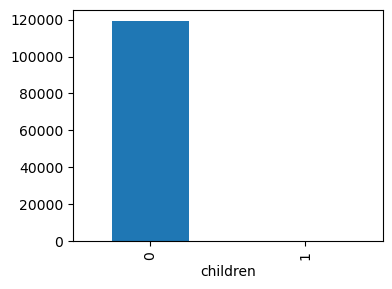

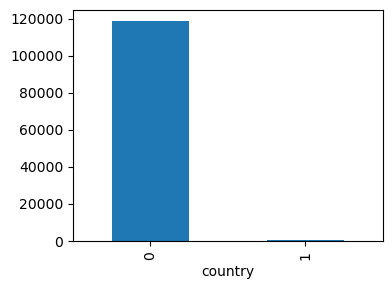

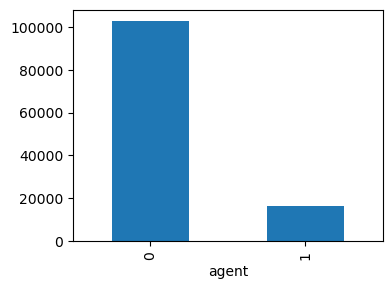

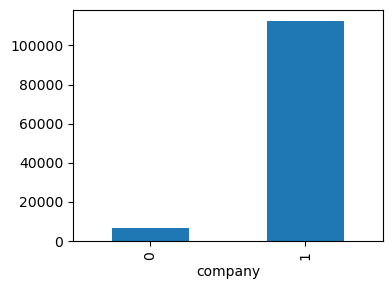

In [13]:
for feature in features_with_na:
    data = dataset.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['is_canceled'].count().plot.bar()
    plt.show()

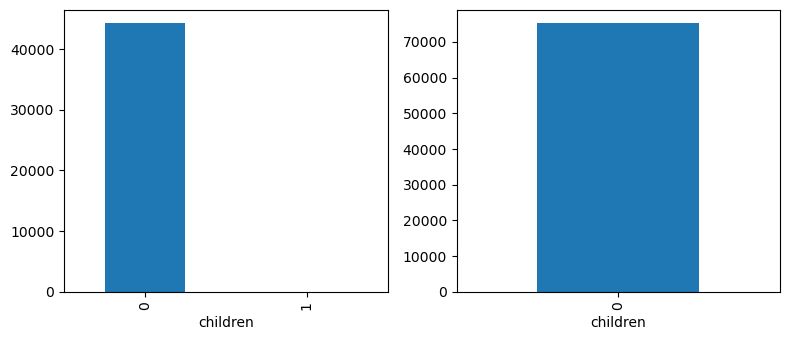

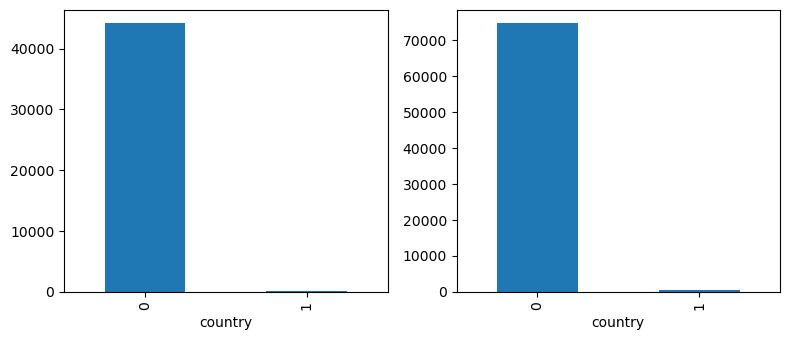

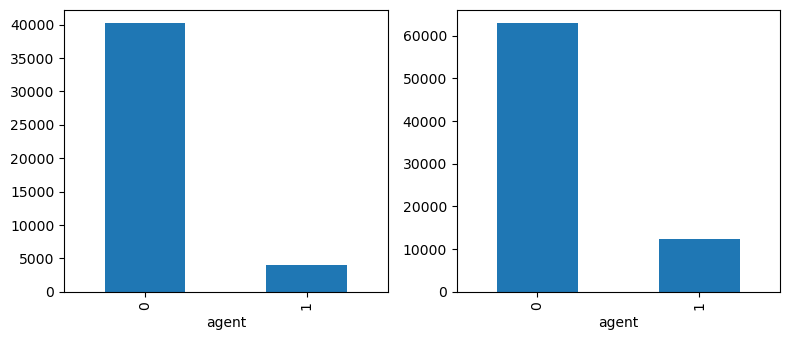

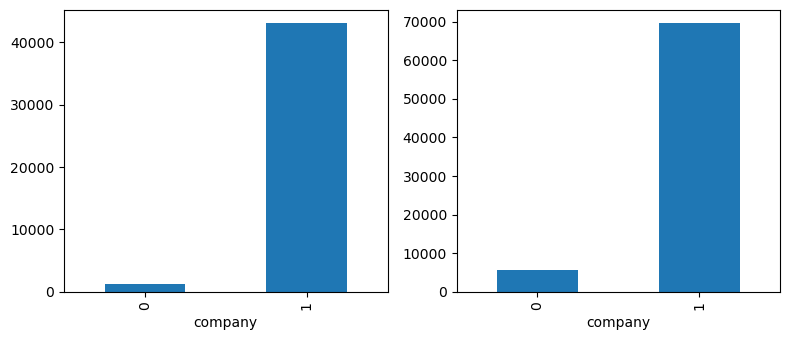

In [14]:
for feature in features_with_na:
    data = cancelled_dataset.copy()
    plt.subplots(figsize=(8,3.5))
    plt.subplot(1,2,1)
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['is_canceled'].count().plot.bar()
    data = not_cancelled_dataset.copy()
    plt.subplot(1,2,2)
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['is_canceled'].count().plot.bar()
    plt.tight_layout()
    plt.show()

company feature can be dropped, as it has more missing values and children and country column nan values can be dropped.
From the above dataset some of the features like name, email, phone-number, credit_card is not required.

### Numerical Variables

In [15]:
numerical_features = [feature for feature in dataset.columns if (dataset[feature].dtypes != 'O' and feature not in ['company'])]
print('No. of numerical features is ', len(numerical_features))
dataset[numerical_features].head()

No. of numerical features is  20


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,342,2015,27,1,0,0,2,0,0,0,0,0,3,NaN,0,0.0,0,0,2015-07-01
1,0,737,2015,27,1,0,0,2,0,0,0,0,0,4,NaN,0,0.0,0,0,2015-07-01
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,0,NaN,0,75.0,0,0,2015-07-02
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,0,304.0,0,75.0,0,0,2015-07-02
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,240.0,0,98.0,0,1,2015-07-03


In [16]:
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique()) < 25 and feature not in ['reservation_status_date']] 

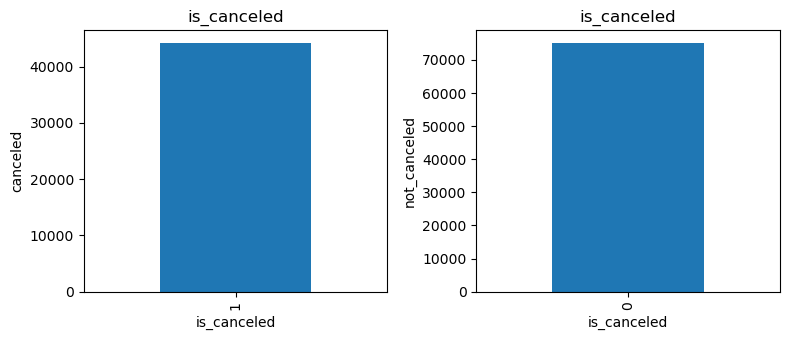

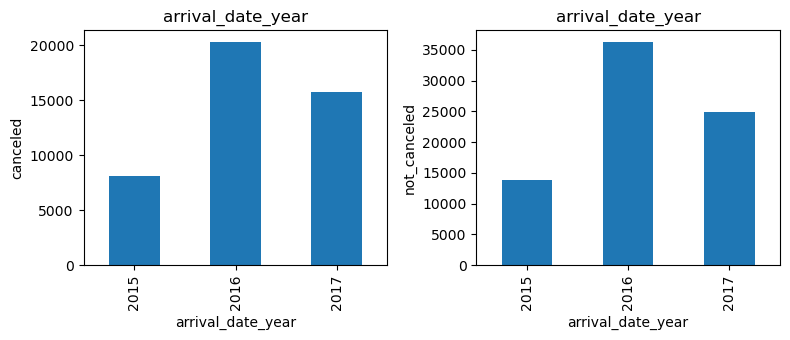

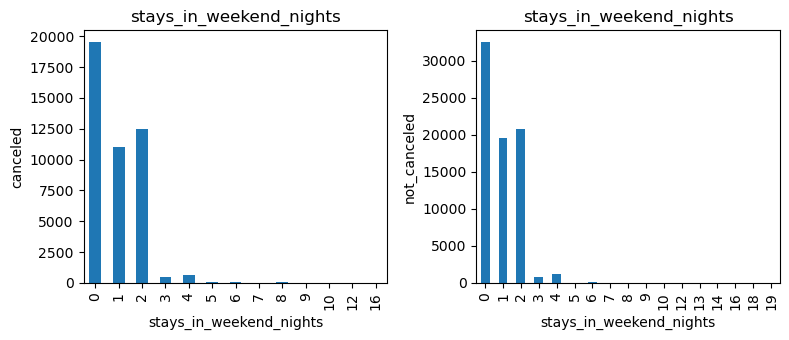

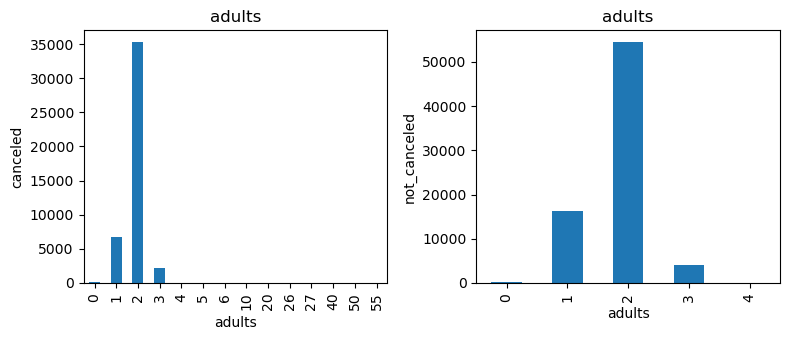

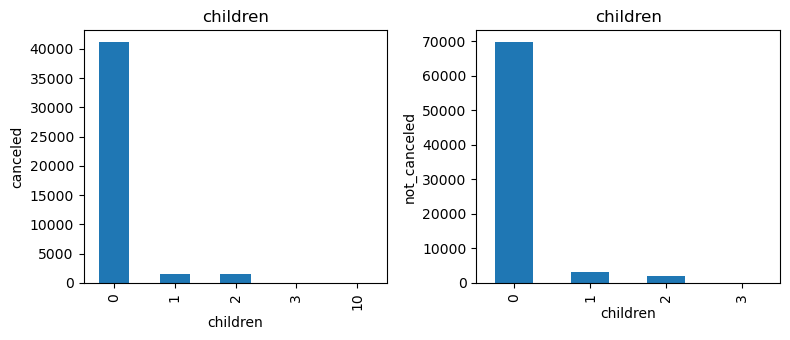

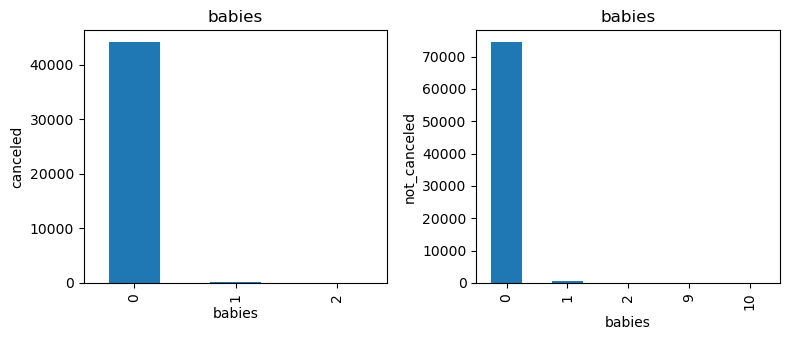

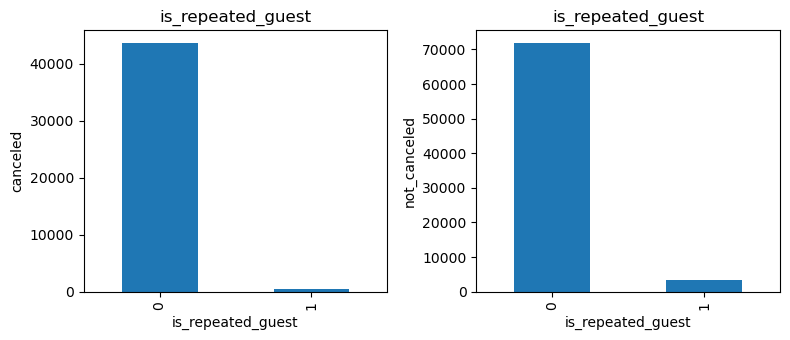

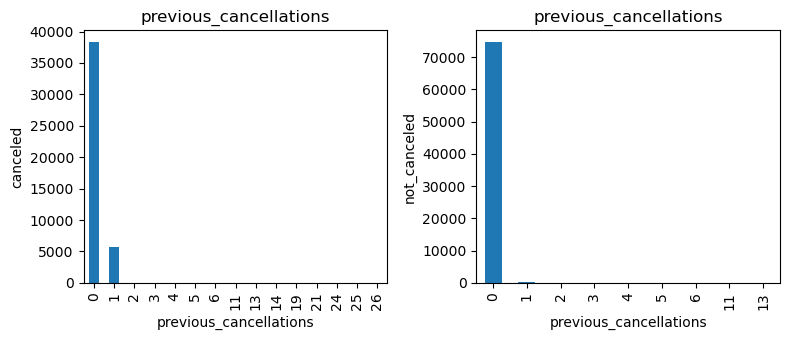

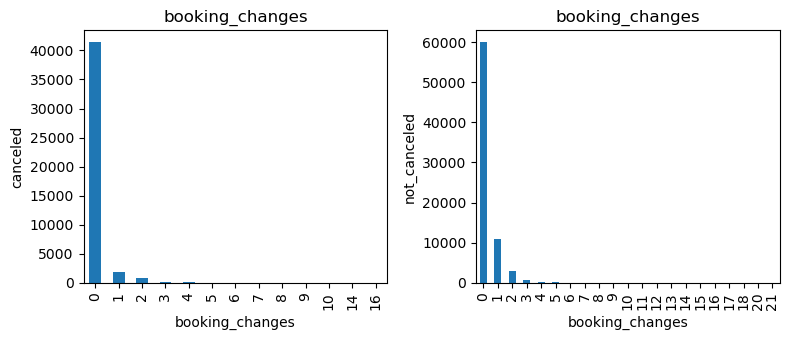

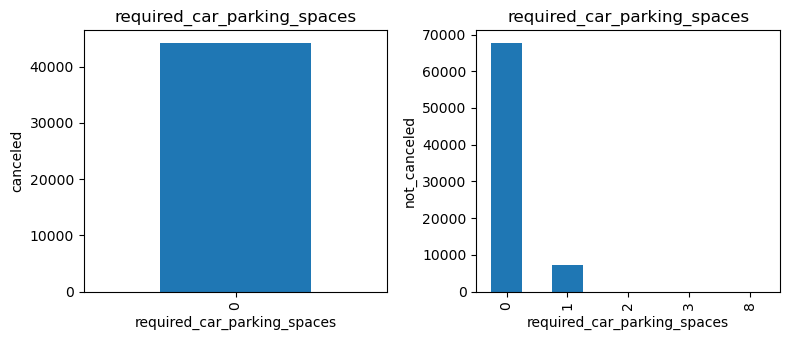

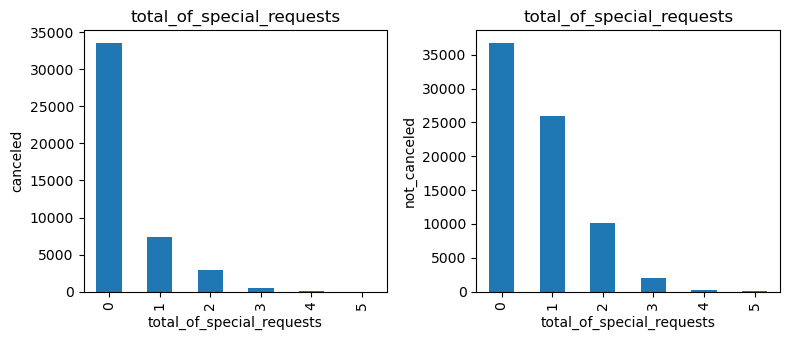

In [17]:
## Lets find the relationship between discrete variables and is_canceled feature
for feature in discrete_features:
    data = cancelled_dataset.copy()
    plt.subplots(figsize=(8, 3.5))
    plt.subplot(1,2,1)
    data.groupby(feature)['is_canceled'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('canceled')
    plt.title(feature)
    data = not_cancelled_dataset.copy()
    plt.subplot(1,2,2)
    data.groupby(feature)['is_canceled'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('not_canceled')
    plt.title(feature)
    plt.tight_layout()
    plt.show()

In [18]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['reservation_status_date']]

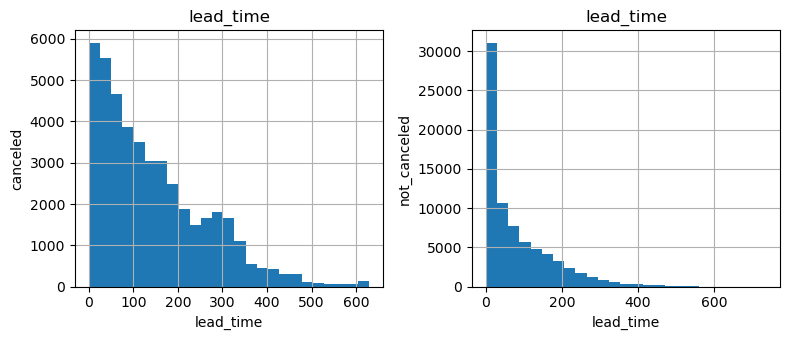

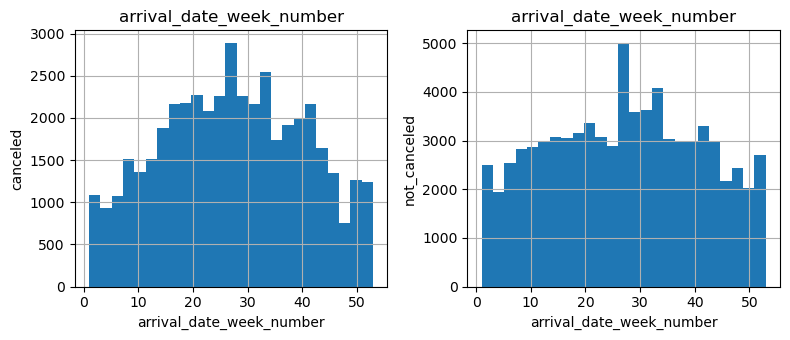

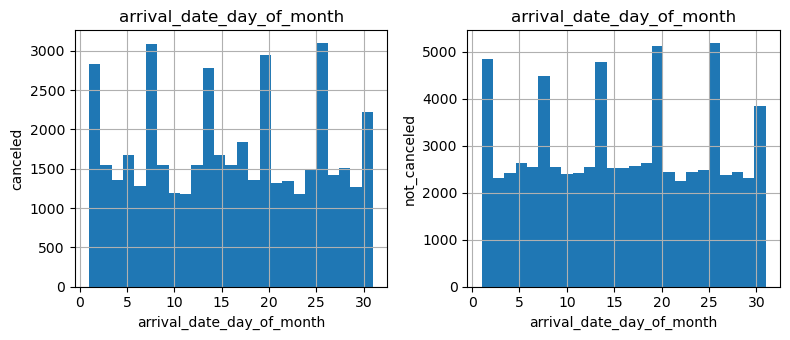

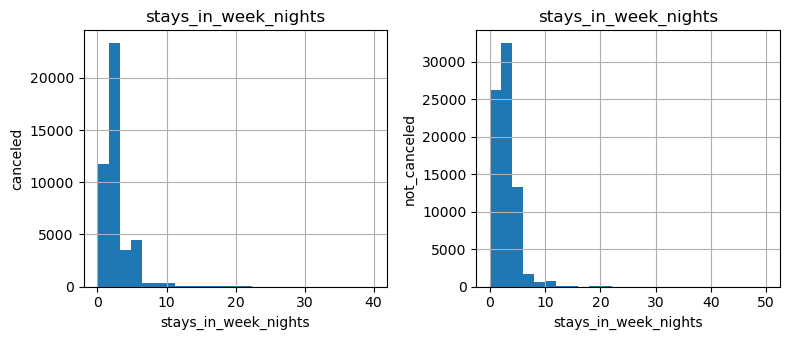

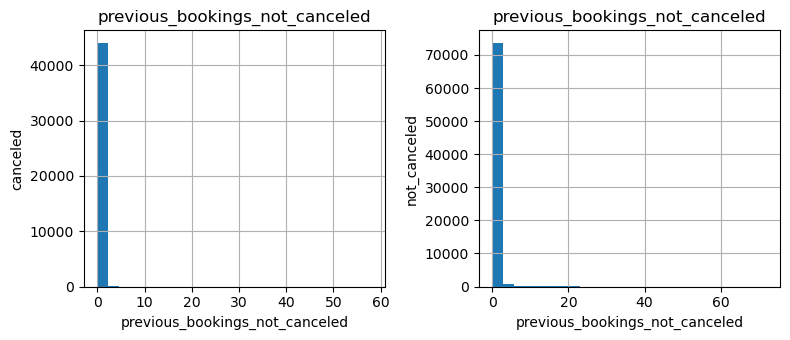

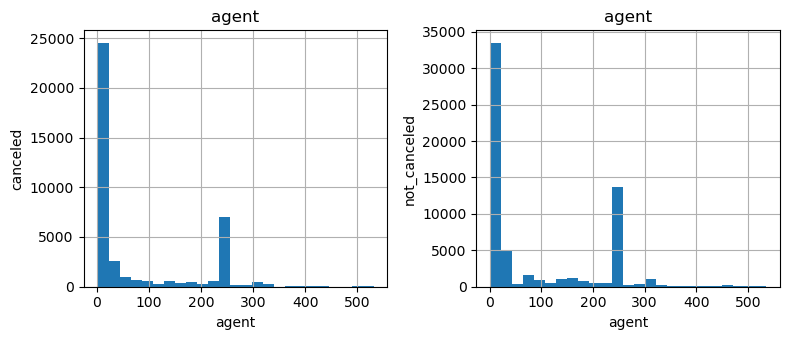

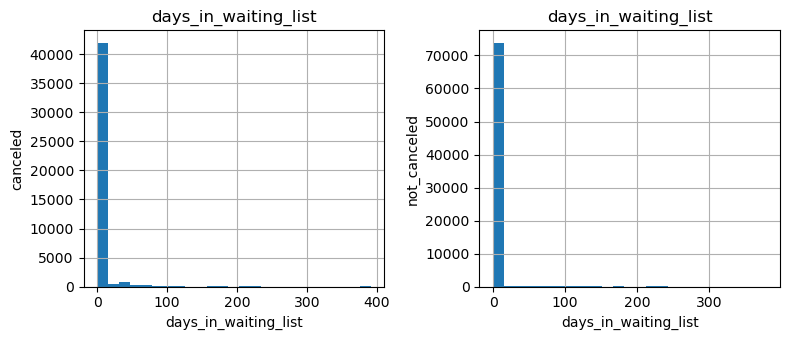

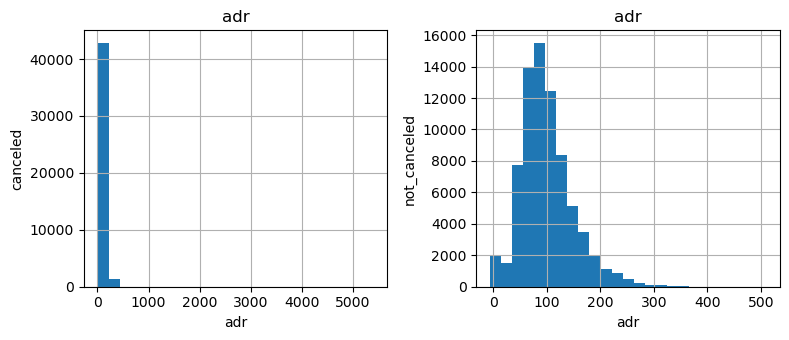

In [19]:
## Lets find the relationship between continuous variables and is_canceled feature
for feature in continuous_features:
    data=cancelled_dataset.copy()
    plt.subplots(figsize=(8, 3.5))
    plt.subplot(1,2,1)
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('canceled')
    plt.title(feature)
    data=not_cancelled_dataset.copy()
    plt.subplot(1,2,2)
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('not_canceled')
    plt.title(feature)
    plt.tight_layout()
    plt.show()

In [20]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.0,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.10389,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.0,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
## It looks like there are more outliers, lets check the outliers

### Outliers

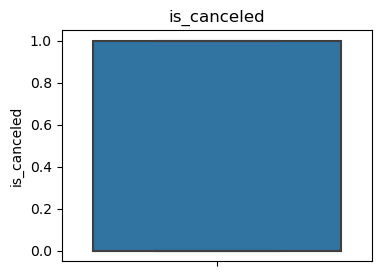

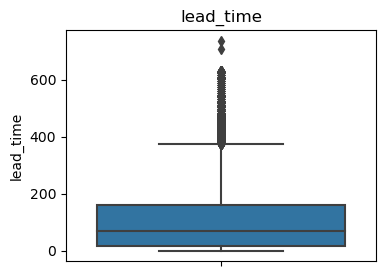

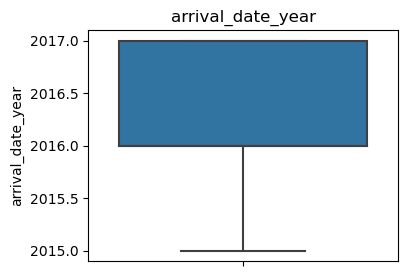

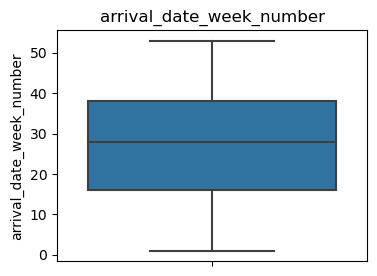

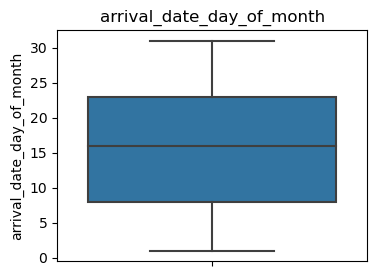

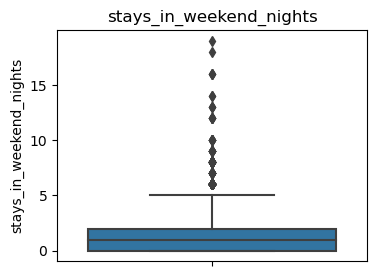

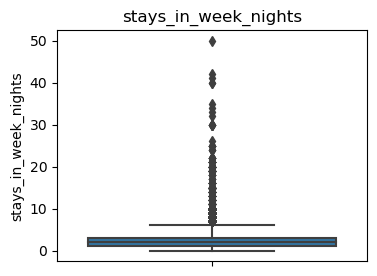

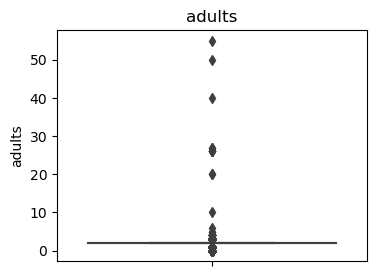

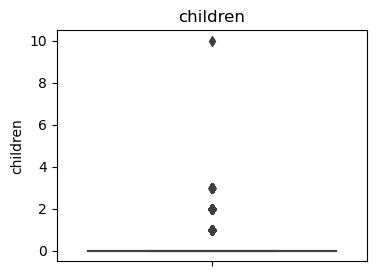

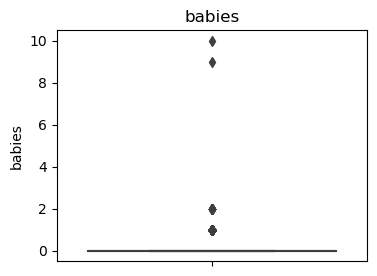

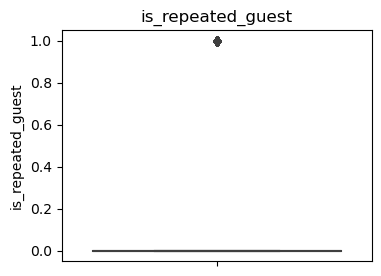

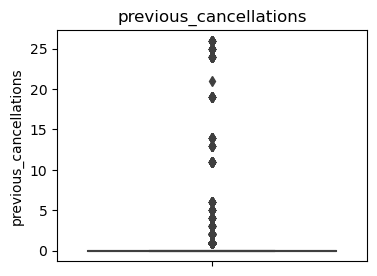

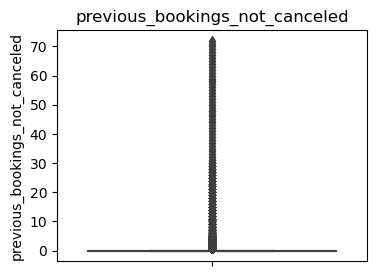

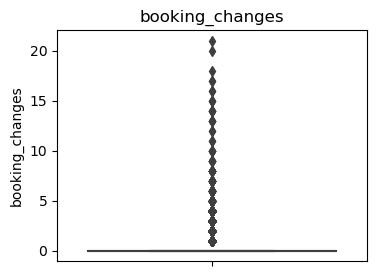

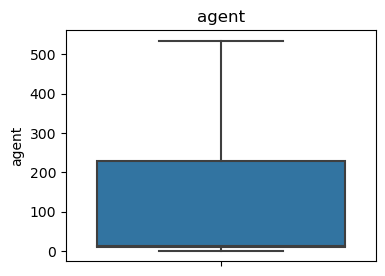

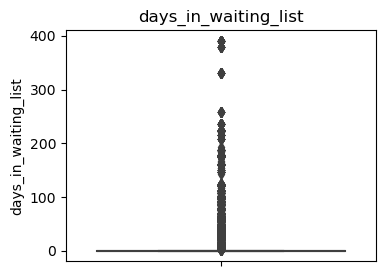

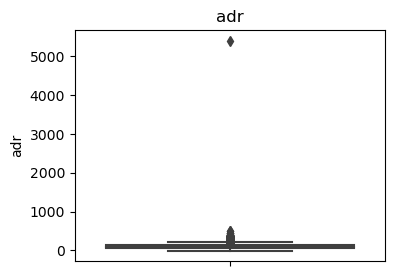

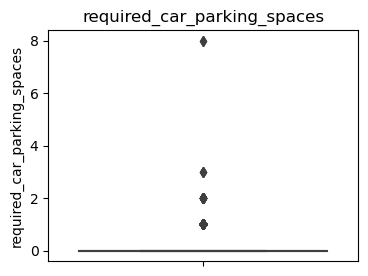

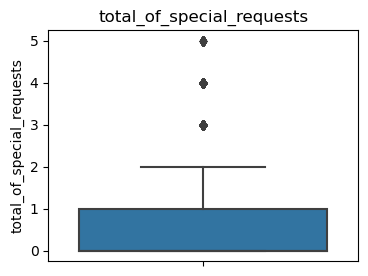

In [21]:
for feature in [feature for feature in numerical_features if feature not in ['company', 'reservation_status_date']]:
    data=dataset.copy()
    sns.boxplot(y = feature, data = data)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
## lead_time, adults, children, babies, adr features outliers should be handled

### Categorical Variables

In [22]:
dataset.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [23]:
for col in dataset.describe(include = 'object').columns:
    print(col)
    print(dataset[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

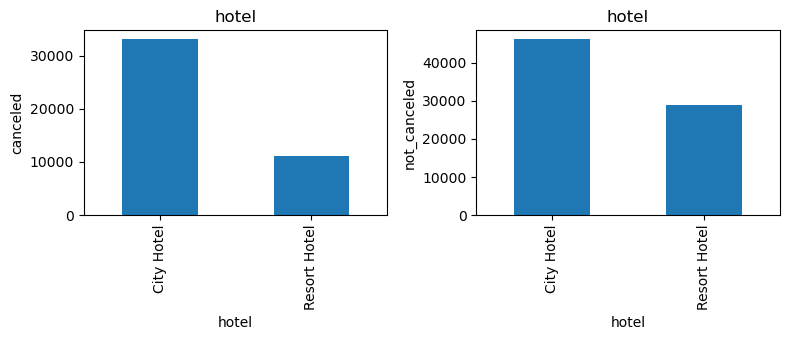

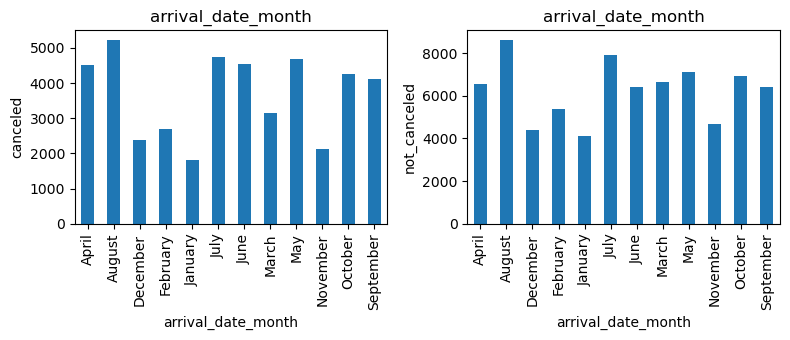

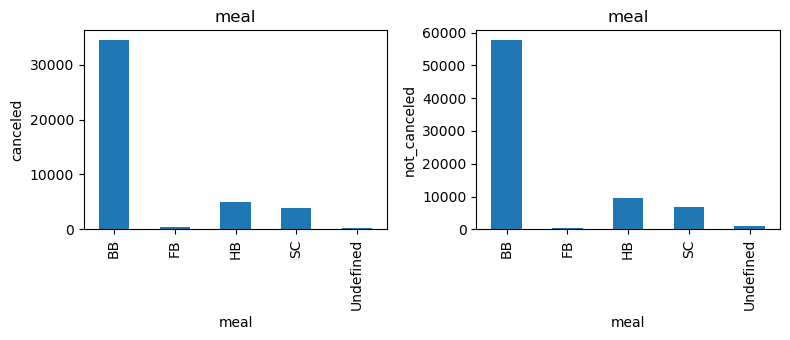

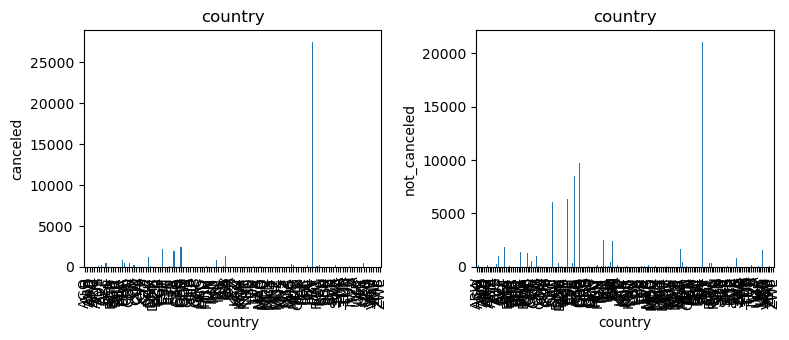

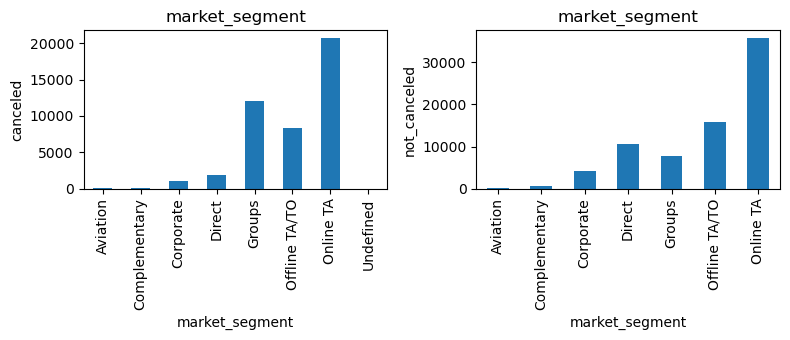

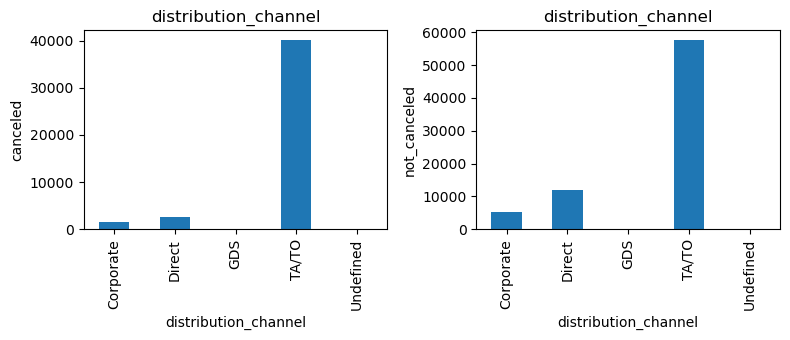

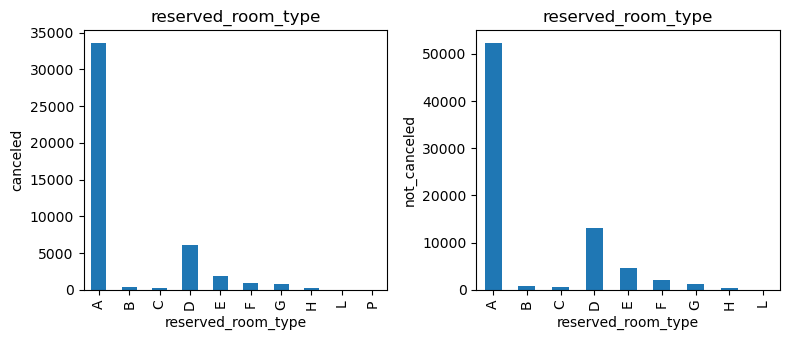

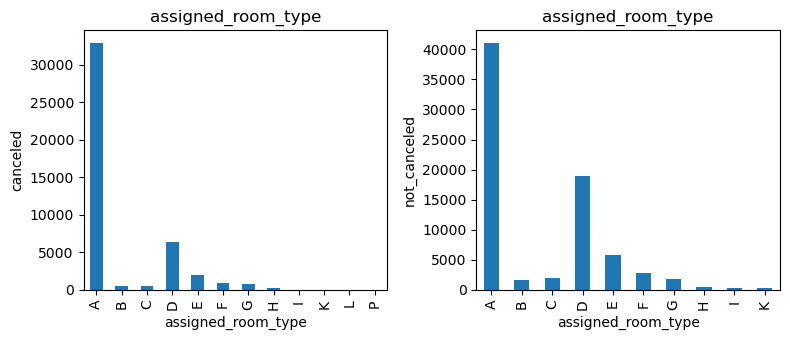

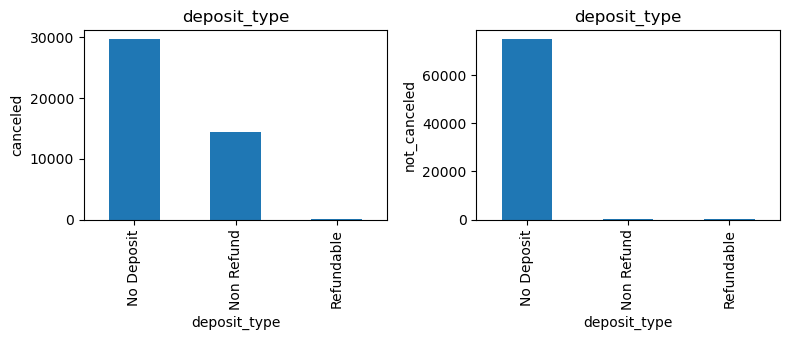

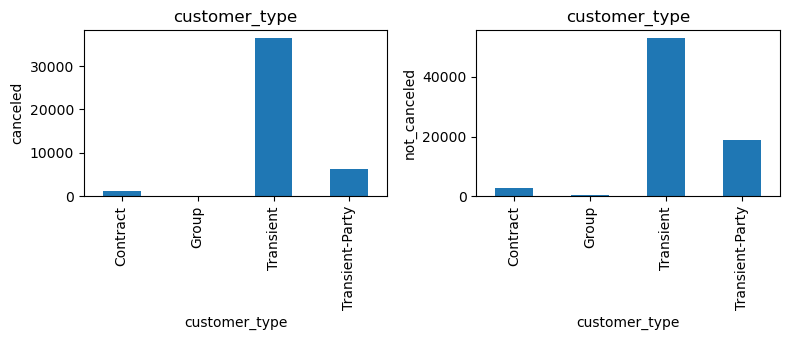

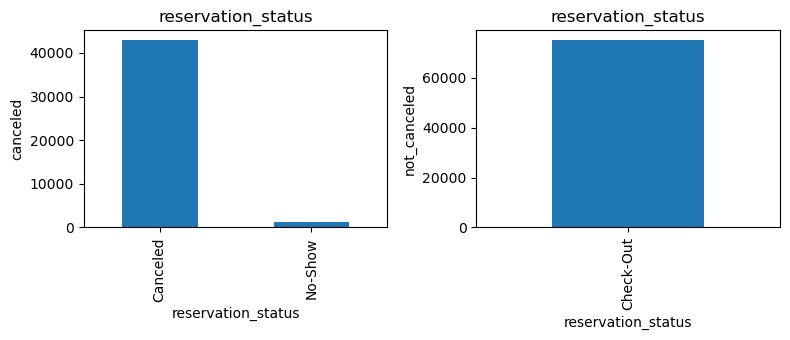

In [24]:
categorical_feature = dataset.describe(include = 'object').columns
for feature in [feature for feature in categorical_feature if feature not in ['name', 'email', 'phone-number', 'credit_card']]:
    data = cancelled_dataset.copy()
    plt.subplots(figsize=(8,3.5))
    plt.subplot(1,2,1)
    data.groupby(feature)['is_canceled'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('canceled')
    plt.title(feature)
    data = not_cancelled_dataset.copy()
    plt.subplot(1,2,2)
    data.groupby(feature)['is_canceled'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('not_canceled')
    plt.title(feature)
    plt.tight_layout()
    plt.show()

### Data Cleaning and Preprocessing

In [25]:
checkpoint_with_missing_values = dataset

In [26]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
## Let us create new feature arrival_date from available features, so that we can measure no_of_days customer take for 
## cancellation of booking using reservation_status_date 

In [27]:
np.sort(dataset['arrival_date_month'].unique())

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [28]:
dataset['arrival_date_month'] = dataset['arrival_date_month'].map({'April':4, 'August':8, 'December':12, 'February':2, 'January':1, 'July':7,
       'June':6, 'March':3, 'May':5, 'November':11, 'October':10, 'September':9})

In [29]:
## Let us create new feature to analyse monthly
dataset['reservation_status_month'] = dataset['reservation_status_date'].dt.month

In [30]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,reservation_status_month
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,7
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,7
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,7
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,7
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,7


In [31]:
new_column_names = {'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'}
data = dataset.rename(columns = new_column_names)

In [32]:
dataset['arrival_date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [33]:
dataset['no_of_days'] = (dataset['arrival_date'] - dataset['reservation_status_date']).dt.days

In [34]:
## we will drop these features as they are not required anymore
dataset.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace = True)

In [35]:
dataset['total_nights'] = dataset['stays_in_weekend_nights'] + dataset['stays_in_week_nights']

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119386 non-null  Int64         
 8   babies                          119390 non-null  int64         
 9   meal                            119390 non-null  object        
 10  country                         118902 non-null  object 

In [37]:
## dropping features that are not required
dataset.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace = True)
dataset.shape

(119390, 33)

In [38]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_month,arrival_date,no_of_days,total_nights
0,Resort Hotel,0,342,27,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,0,0
1,Resort Hotel,0,737,27,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,0,0
2,Resort Hotel,0,7,27,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,-1,1
3,Resort Hotel,0,13,27,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,-1,1
4,Resort Hotel,0,14,27,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,-2,2


### Handling Missing Values

In [39]:
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), '% missing values')

children 0.0 % missing values
country 0.0041 % missing values
agent 0.1369 % missing values
company 0.9431 % missing values


In [40]:
## As there are more no. of missing values in company feature, we will drop it
dataset.drop(['company'], axis = 1, inplace = True)

In [41]:
dataset['agent'].isnull().sum()

16340

In [42]:
## missing values in agent feature are no-agents, we will represent it by 0
dataset['agent'] = dataset['agent'].fillna(0)
dataset['agent'] = dataset['agent'].astype('Int64')

In [43]:
dataset['country'].isnull().sum()

488

In [44]:
## we will replace missing values with label Missing
dataset['country'] = dataset['country'].fillna('Missing')

In [45]:
## will remove missing values of children feature, as there are only 4 missing values
dataset.dropna(subset=['children'], inplace = True)
dataset.shape

(119386, 32)

In [46]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

### Handling Outliers

In [47]:
checkpoint_with_outliers = dataset

In [48]:
dataset.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_month,no_of_days,total_nights
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.0,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.0,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,27.165003,0.927605,2.500310,1.856390,0.10389,0.007949,0.031913,0.087121,0.137102,0.221131,74.830633,2.321227,101.833541,0.062520,0.571340,6.334068,29.677986,3.427914
std,0.482913,106.863286,13.605334,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,107.142996,17.595011,50.534664,0.245295,0.792798,3.346394,70.069008,2.557444
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-6.380000,0.000000,0.000000,1.000000,-69.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.0,0.000000,69.290000,0.000000,0.000000,3.000000,-3.000000,2.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.0,0.000000,94.590000,0.000000,0.000000,6.000000,-1.000000,3.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,152.0,0.000000,126.000000,0.000000,1.000000,9.000000,26.000000,4.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.0,10.000000,1.000000,26.000000,72.000000,21.000000,535.0,391.000000,5400.000000,8.000000,5.000000,12.000000,526.000000,69.000000


In [49]:
numerical_features = [feature for feature in dataset.columns if (dataset[feature].dtypes != 'O' and feature not in ['reservation_status_date','arrival_date'])]
for feature in [feature for feature in numerical_features]:
    print(feature)
    print(np.sort(dataset[feature].unique()))
    print('-'*50)

is_canceled
[0 1]
--------------------------------------------------
lead_time
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 

In [50]:
def remove_outliers(feature, dataset):
    data = dataset.copy()
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print(np.sort(data[(data[feature]>lower_bound)&(data[feature]<upper_bound)][feature].unique()))
    return data[(data[feature]>lower_bound)&(data[feature]<upper_bound)]

In [51]:
## To handle outliers in lead_time feature
df = remove_outliers('lead_time', dataset)
df.shape

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

(116352, 32)

In [52]:
## dropped outliers
dataset = df

In [53]:
dataset.shape

(116352, 32)

In [54]:
df = remove_outliers('total_nights', dataset)
df.shape

[0 1 2 3 4 5 6]


(102523, 32)

In [55]:
## To handle outliers in adults, children and babies features 
## lets create new feature total_people
dataset['total_people'] = dataset['adults']+dataset['children']+dataset['babies']

In [56]:
print('total_people with 0: {}'.format(dataset[dataset['total_people']==0].shape[0]))
print('total_people with >6: {}'.format(dataset[dataset['total_people']>6].shape[0]))
df = dataset[(dataset['total_people']>0)&(dataset['total_people']<7)]
df.shape

total_people with 0: 179
total_people with >6: 16


(116157, 33)

In [57]:
## dropped outliers
dataset = df
print('total_people with 0: {}'.format(dataset[dataset['total_people']==0].shape[0]))
print('total_people with >6: {}'.format(dataset[dataset['total_people']>6].shape[0]))

total_people with 0: 0
total_people with >6: 0


In [58]:
## handling outliers in adr feature
print(dataset['adr'].max())
dataset[dataset['adr']>1000.0]

5400.0


,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_month,arrival_date,no_of_days,total_nights,total_people
48515,City Hotel,1,35,13,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12,0,Transient,5400.0,0,0,Canceled,2016-02-19,2,2016-03-25,35,1,2


In [59]:
print(dataset.shape)
df = dataset[dataset['adr']<2000]

(116157, 33)


In [60]:
## dropping outliers
dataset = df
dataset.shape

(116156, 33)

In [61]:
for feature in [feature for feature in numerical_features+['total_people']]:
    print(feature)
    print(np.sort(dataset[feature].unique()))
    print('-'*50)

is_canceled
[0 1]
--------------------------------------------------
lead_time
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 

### Data Visualization

In [62]:
checkpoint_without_outliers = dataset

### Booking Types
### Booking Status cancelled vs confirmed reservations

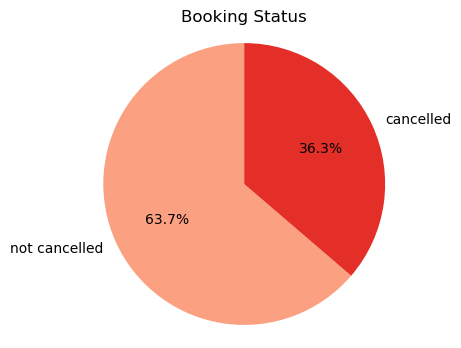

In [68]:
canceled_counts = dataset['is_canceled'].value_counts(normalize = True)
plt.figure(figsize=(4,4))
colors = sns.color_palette('Reds', n_colors=len(canceled_counts))
plt.pie(canceled_counts, labels=['not cancelled', 'cancelled'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Booking Status')
plt.axis('equal')
#plt.show()
plt.savefig('bookingstatus', dpi=200, bbox_inches='tight')

The accompanying pie chart shows the percentage of reservations that are cancelled and those that are not. It is obvious that there are still a significant number of reservations that have not been cancelled. There are still 36% of customers who cancelled their reservation, which has a significant impact on the hotel's revenue.

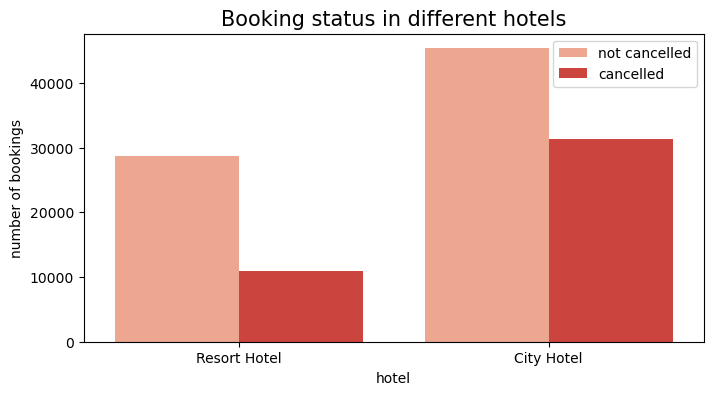

In [69]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = dataset, palette = 'Reds')
plt.legend(['not cancelled', 'cancelled'])
plt.title('Booking status in different hotels', fontsize = 15)
plt.xlabel('hotel')
plt.ylabel('number of bookings')
#plt.show()
plt.savefig('bsbyhotels', dpi=200, bbox_inches='tight')

In comparison to resort hotels, city hotels have more bookings and even city hotels have higher booking cancellation ratio than resort hotels.

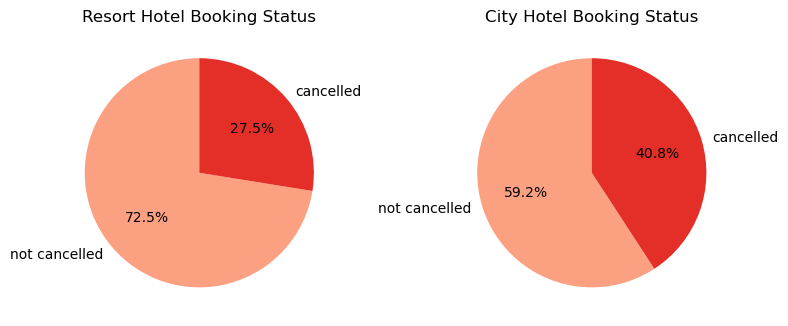

In [70]:
resort_hotel = dataset[dataset['hotel'] == 'Resort Hotel']
resort_hotel_count = resort_hotel['is_canceled'].value_counts(normalize = True)

city_hotel = dataset[dataset['hotel'] == 'City Hotel']
city_hotel_count = city_hotel['is_canceled'].value_counts(normalize = True)

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
colors = sns.color_palette('Reds', n_colors=len(canceled_counts))
axs[0].pie(resort_hotel_count, labels=['not cancelled', 'cancelled'], colors=colors, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Resort Hotel Booking Status')
axs[1].pie(city_hotel_count, labels=['not cancelled', 'cancelled'], colors=colors, autopct='%1.1f%%', startangle=90)
axs[1].set_title('City Hotel Booking Status')
plt.tight_layout()
plt.show()

### Average Daily Rate in city and resort Hotels

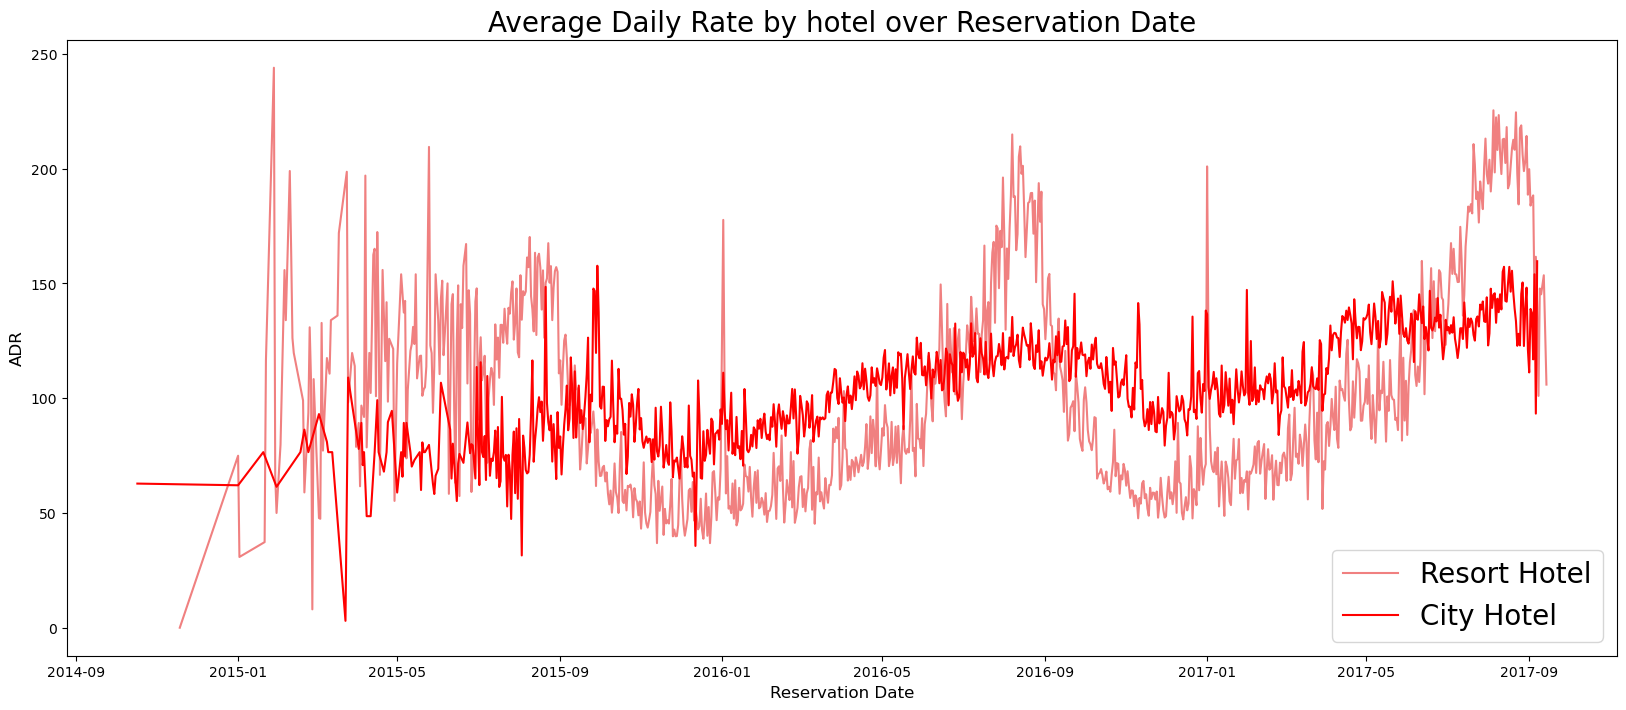

In [76]:
resort_hotel = dataset[dataset['hotel'] == 'Resort Hotel']
city_hotel = dataset[dataset['hotel'] == 'City Hotel']

resort_hotel_data = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_data = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate by hotel over Reservation Date', fontsize = 20)
plt.xlabel('Reservation Date', fontsize=12)
plt.ylabel('ADR', fontsize=12)
plt.plot(resort_hotel_data.index, resort_hotel_data['adr'], label = 'Resort Hotel', color='lightcoral')
plt.plot(city_hotel_data.index, city_hotel_data['adr'], label = 'City Hotel', color='red')
plt.legend(fontsize=20)
#plt.show()
plt.savefig('adrbyhotel', dpi=200, bbox_inches='tight')

The line graph above shows that, average daily rate for Resort Hotel tend to change more frequently or seasonaly, but for City Hotel there is less change in ADR compared to Resort Hotel.

##  Booking Patterns with Seasonality:
### Month wise Bookings

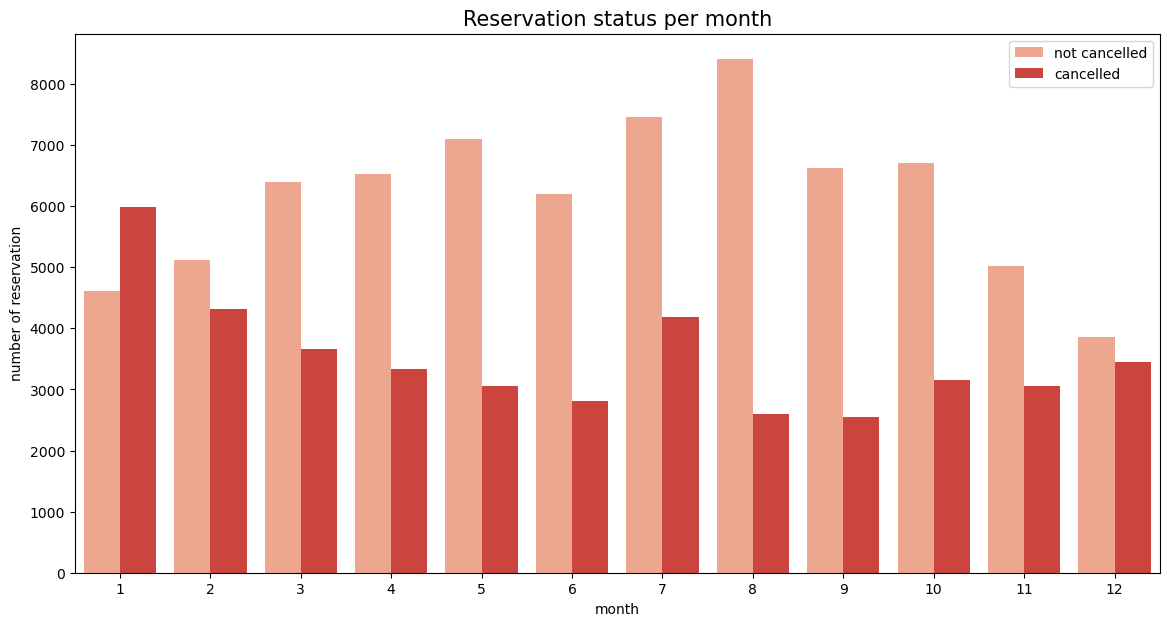

In [79]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = 'reservation_status_month', hue = 'is_canceled',palette = 'Reds', data = dataset)
plt.title('Reservation status per month', fontsize = 15)
plt.xlabel('month')
plt.ylabel('number of reservation')
plt.legend(['not cancelled', 'cancelled'])
#plt.show()
plt.savefig('bsbymonth', dpi=200, bbox_inches='tight')

We have developed the grouped bar graph to analyze the months with highest and lowest reservation. As can be seen, in the month of August the number of confirmed reservation are the highest and cancelled reservation are the lowest. In the month of January cancellations are higher than the confirmed reservation and it has the highest cancellations.

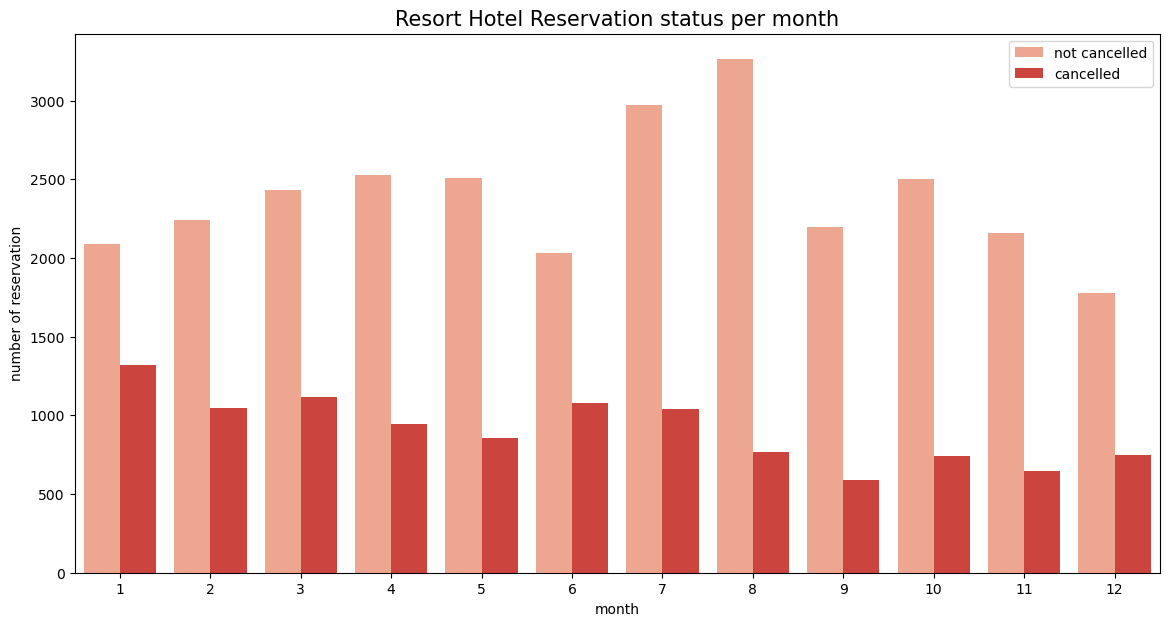

In [80]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = 'reservation_status_month', hue = 'is_canceled', palette = 'Reds', data = dataset[dataset['hotel']=='Resort Hotel'])
plt.title('Resort Hotel Reservation status per month', fontsize = 15)
plt.xlabel('month')
plt.ylabel('number of reservation')
plt.legend(['not cancelled', 'cancelled'])
plt.show()

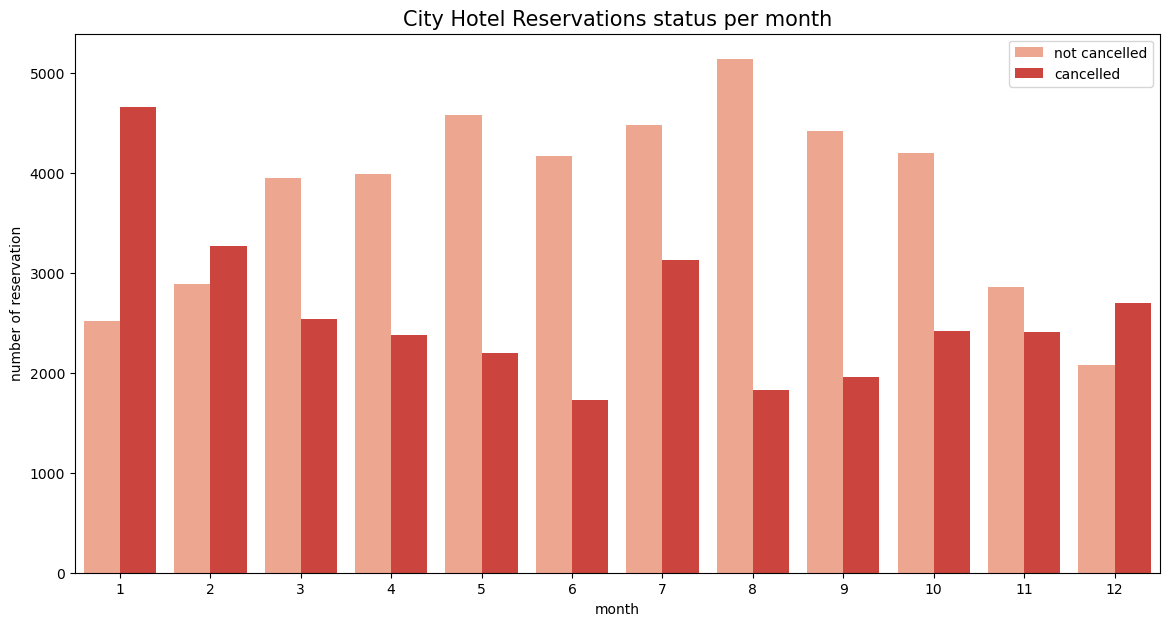

In [81]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = 'reservation_status_month', hue = 'is_canceled', palette = 'Reds', data = dataset[dataset['hotel']=='City Hotel'])
plt.title('City Hotel Reservations status per month', fontsize = 15)
plt.xlabel('month')
plt.ylabel('number of reservation')
plt.legend(['not cancelled', 'cancelled'])
#plt.show()
plt.savefig('cityhotelbsbymonth', dpi=200, bbox_inches='tight')

For City Hotel, in the month of January, February and December cancellations are higher than the confirmed reservation. Cancellations are lower in the month of June, August and September.

### ADR for Cancelled and Confirmed Bookings

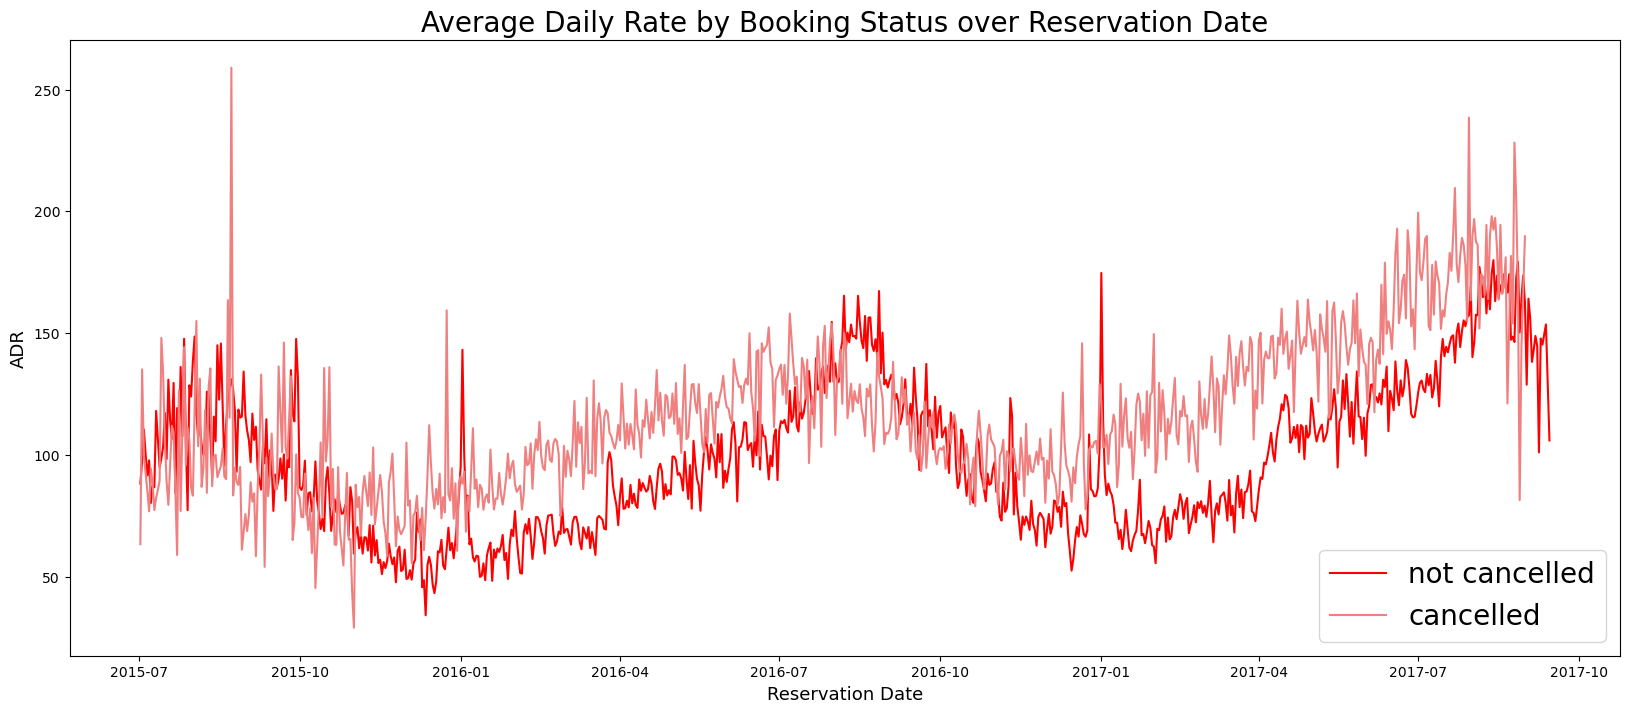

In [82]:
cancelled_data_adr = dataset[(dataset['is_canceled']==1)&(dataset['reservation_status_date']>'2015-07')].groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace = True)
cancelled_data_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data_adr = dataset[(dataset['is_canceled']==0)&(dataset['reservation_status_date']>'2015-07')].groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace = True)
not_cancelled_data_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,8))
plt.title('Average Daily Rate by Booking Status over Reservation Date', fontsize = 20)
plt.plot(not_cancelled_data_adr['reservation_status_date'], not_cancelled_data_adr['adr'], color = 'red', label = 'not cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'], cancelled_data_adr['adr'], color = 'lightcoral', label = 'cancelled')
plt.xlabel('Reservation Date', fontsize = 13)
plt.ylabel('ADR', fontsize = 13)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('adrbybs', dpi=200, bbox_inches='tight')

The bar graph demonstrates that cancellations are most common when prices are high and least common when the prices are low. Therefore, the cost of the accommodation is responsible for cancellation.

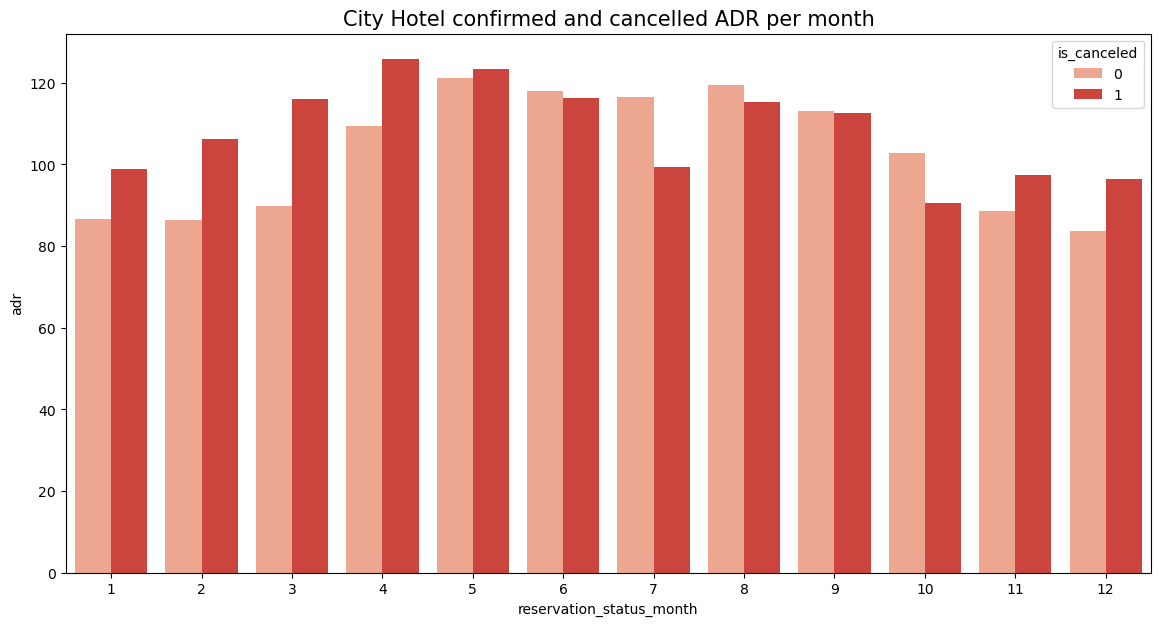

In [83]:
plt.figure(figsize = (14, 7))
sns.barplot(x = 'reservation_status_month', y = 'adr', hue = 'is_canceled', palette = 'Reds', data = dataset[dataset['hotel']=='City Hotel'].groupby(['reservation_status_month', 'is_canceled'])[['adr']].mean().reset_index())
plt.title('City Hotel confirmed and cancelled ADR per month', fontsize = 15)
plt.show()

Cancellations were higher than the confirmed reservation in January, February and December, from the above bar graph we can observe that cancelled ADR is higher than the confirmed ADR in those months.

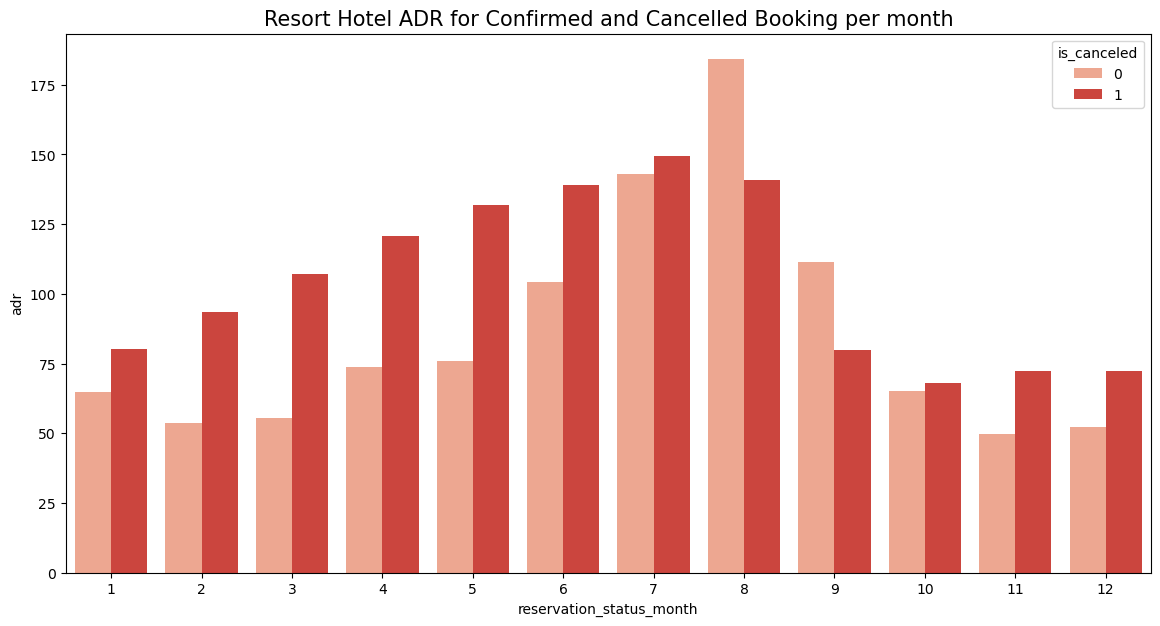

In [86]:
plt.figure(figsize = (14, 7))
sns.barplot(x = 'reservation_status_month', y = 'adr', hue = 'is_canceled', palette = 'Reds', data = dataset[dataset['hotel']=='Resort Hotel'].groupby(['reservation_status_month', 'is_canceled'])[['adr']].mean().reset_index())
plt.title('Resort Hotel ADR for Confirmed and Cancelled Booking per month', fontsize = 15)
#plt.show()
plt.savefig('resorthoteladrbybs', dpi=200, bbox_inches='tight')

From the above bar graph, it can be seen almost in every month of Resort Hotel average daily rate of cancelled reservation are higher than the confirmed reservation. ADR can be reduced in Resort hotel in order to reduce cancellations. 

### Average Lead Time

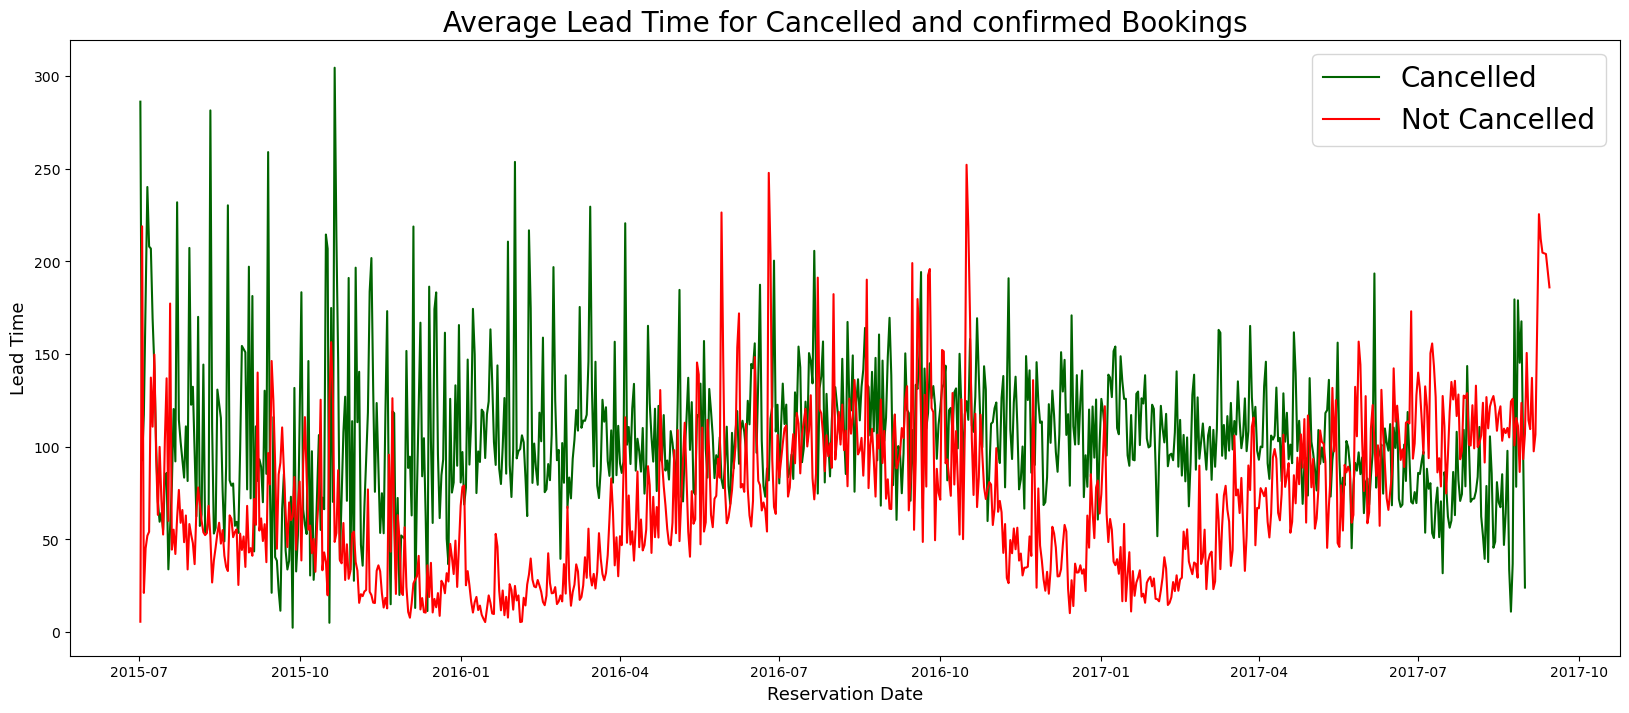

In [87]:
cancelled_dataset = dataset[(dataset['is_canceled']==1)&(dataset['reservation_status_date']>'2015-07')]
not_cancelled_dataset = dataset[(dataset['is_canceled']==0)&(dataset['reservation_status_date']>'2015-07')]

cancelled_data = cancelled_dataset.groupby('reservation_status_date')[['lead_time']].mean()
not_cancelled_data = not_cancelled_dataset.groupby('reservation_status_date')[['lead_time']].mean()

plt.figure(figsize=(20,8))
plt.title('Average Lead Time for Cancelled and confirmed Bookings', fontsize = 20)
plt.plot(cancelled_data.index, cancelled_data['lead_time'], color = 'darkgreen', label = 'Cancelled')
plt.plot(not_cancelled_data.index, not_cancelled_data['lead_time'], color = 'red', label = 'Not Cancelled')
plt.xlabel('Reservation Date', fontsize = 13)
plt.ylabel('Lead Time', fontsize = 13)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('avgleadtimebybs', dpi=200, bbox_inches='tight')

The above line chart demonstrates the average lead time for cancelled and confirmed reservations, most of the time cancelled reservation has higher lead time than the confirmed ones. Therefore, the higher lead time leads to cancellations.

### Booking Length

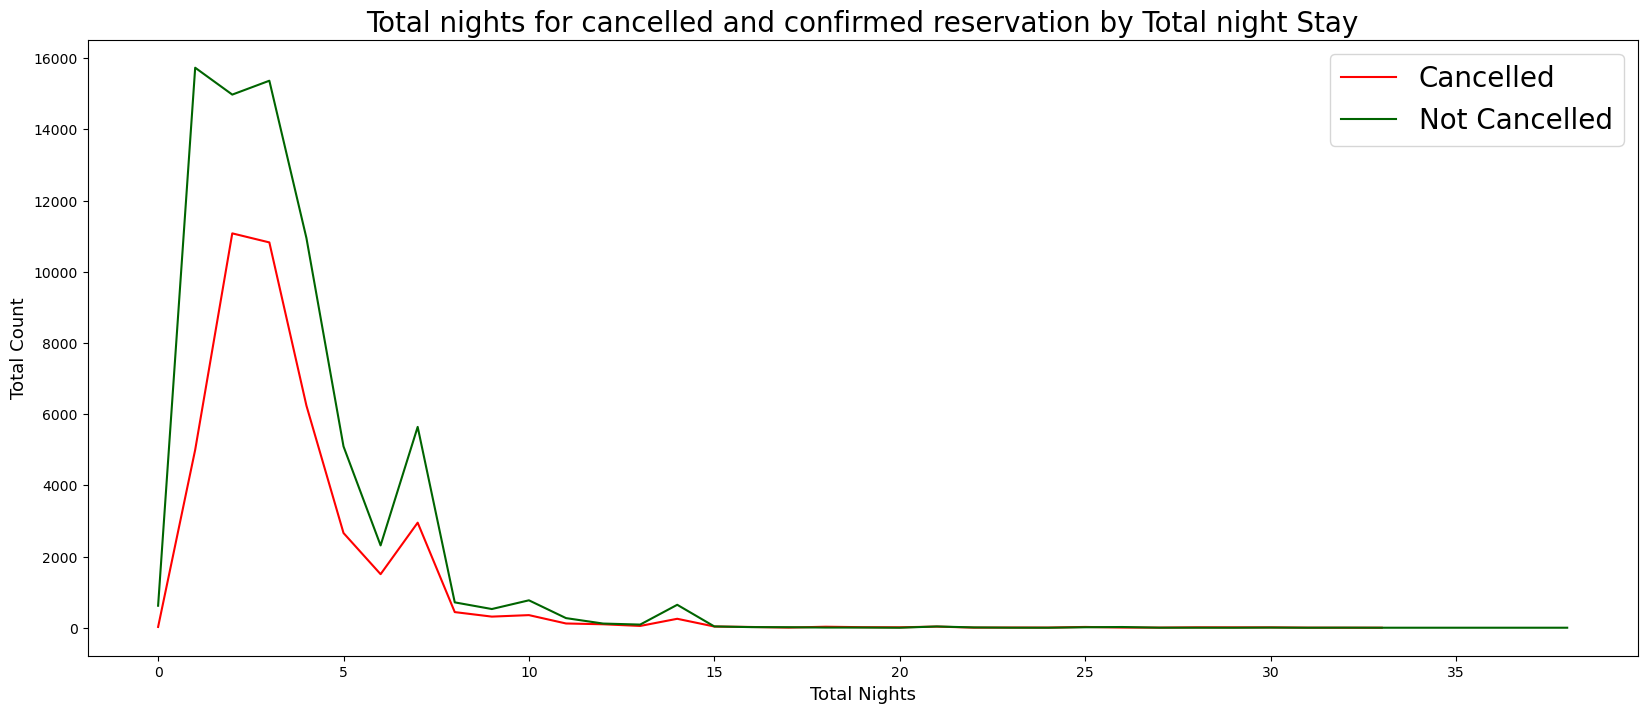

In [88]:
cancelled_dataset = dataset[dataset['is_canceled']==1]
not_cancelled_dataset = dataset[dataset['is_canceled']==0]

cancelled_data = cancelled_dataset.groupby('total_nights')['is_canceled'].size().reset_index()
not_cancelled_data = not_cancelled_dataset.groupby('total_nights')['is_canceled'].size().reset_index()

plt.figure(figsize=(20,8))
plt.title('Total nights for cancelled and confirmed reservation by Total night Stay', fontsize = 20)
plt.plot(cancelled_data.index, cancelled_data['is_canceled'], color = 'red', label = 'Cancelled')
plt.plot(not_cancelled_data.index, not_cancelled_data['is_canceled'], color = 'darkgreen', label = 'Not Cancelled')
plt.xlabel('Total Nights', fontsize=13)
plt.ylabel('Total Count', fontsize=13)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('totalnights', dpi=200, bbox_inches='tight')

From the above line graph, we can observe both cancelled and confirmed reservation has same ratio for no. of nights.

### Share of Market Segment

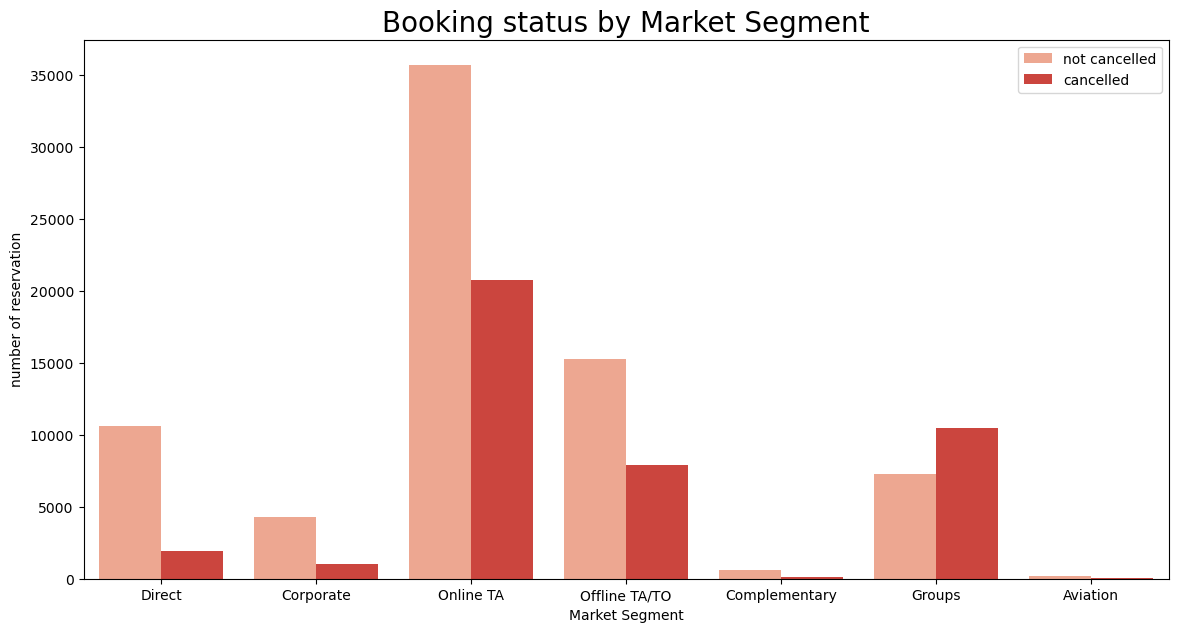

In [89]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = 'market_segment', hue = 'is_canceled', palette = 'Reds', data = dataset)
plt.title('Booking status by Market Segment', size = 20)
plt.xlabel('Market Segment')
plt.ylabel('number of reservation')
plt.legend(['not cancelled', 'cancelled'])
#plt.show()
plt.savefig('bsbymarketsegment', dpi=200, bbox_inches='tight')

Bookings are more from Online Travel Agent, cancellations are also in more numbers from online travel agents. In Groups category, cancellations are more than confirmed reservations. 

### Share of Assigned Room Type

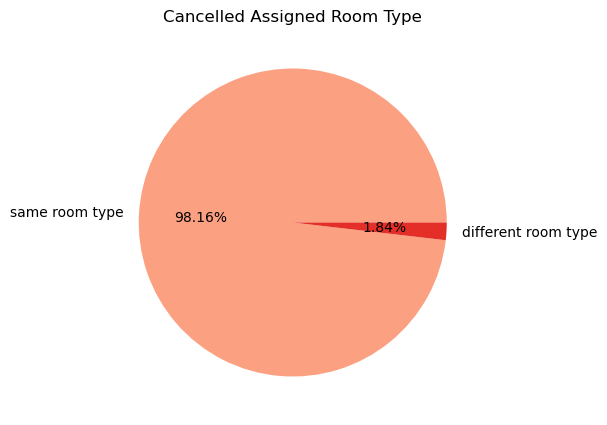

In [90]:
same = cancelled_dataset[cancelled_dataset['reserved_room_type']==cancelled_dataset['assigned_room_type']].shape[0]
different = cancelled_dataset[cancelled_dataset['reserved_room_type']!=cancelled_dataset['assigned_room_type']].shape[0]
a = [same, different]
count = pd.Series(a, index = ['same room type', 'different room type'])
plt.figure(figsize = (5,5))
colors = sns.color_palette('Reds', n_colors=len(count))
plt.title('Cancelled Assigned Room Type')
plt.pie(count, autopct = '%1.2f%%', colors = colors, labels = count.index)
#plt.show()
plt.savefig('assroomtype', dpi=200, bbox_inches='tight')

The accompanying pie chart shows the percentage of cancelled reservation's assigned room type, where most of the cancelled reservations are assigned with the same room type as they reserved. Only 1.84% of reservations are assigned with different room type.

### Deposit Type

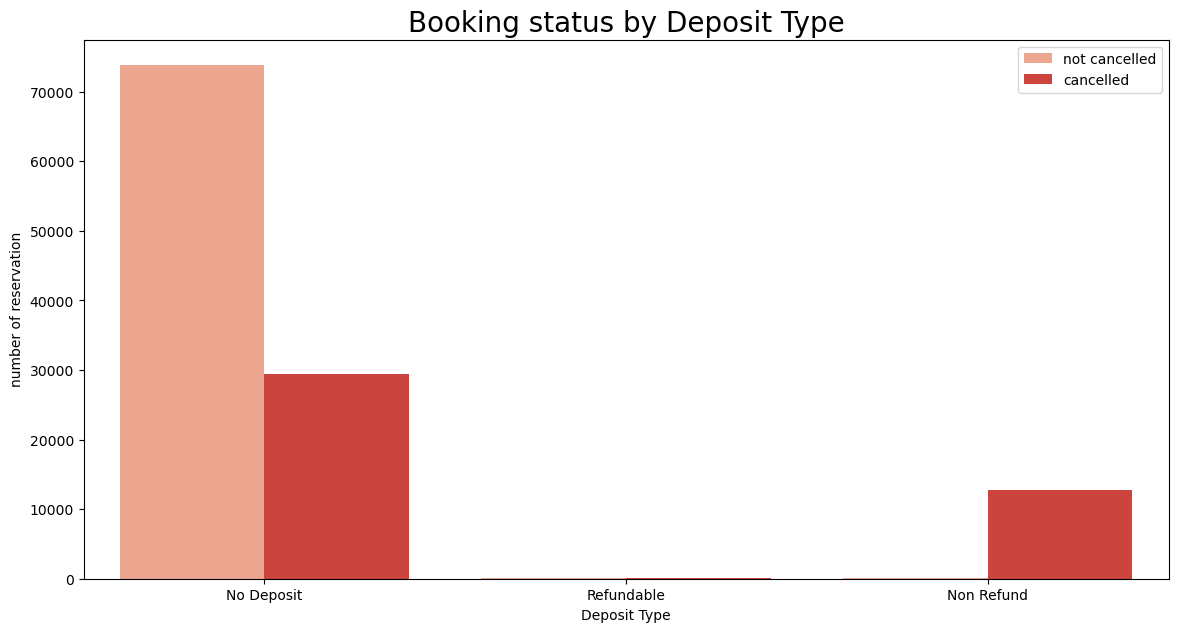

In [91]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = 'deposit_type', hue = 'is_canceled', palette = 'Reds', data = dataset)
plt.title('Booking status by Deposit Type', size = 20)
plt.xlabel('Deposit Type')
plt.ylabel('number of reservation')
plt.legend(['not cancelled', 'cancelled'])
#plt.show()
plt.savefig('bsbydeposittype', dpi=200, bbox_inches='tight')

Most of the reservations are done without any deposit and highest cancellations are reserved without any deposit. Non Refund type of cancelled reservations tend to cancel more in ratio compared to confirmed non-refund type.

### Waiting List

Average Waiting Time for Cancelled Bookings: 306.0 days
Average Waiting Time for Not Cancelled Bookings: 141.0 days


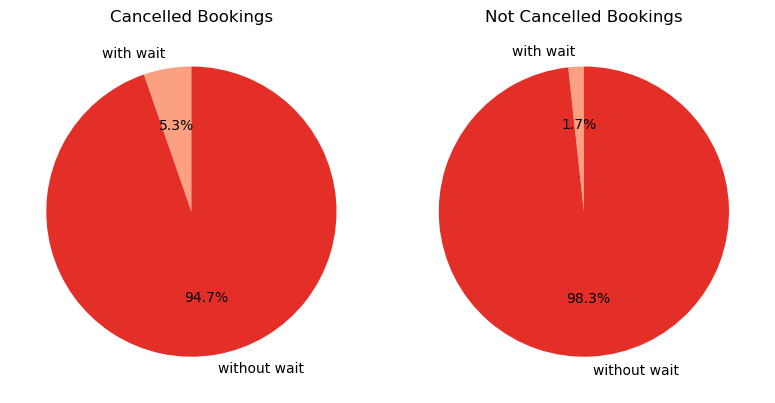

In [92]:
cancelled_wait = cancelled_dataset[(cancelled_dataset['days_in_waiting_list']>0)]['days_in_waiting_list'].count()
cancelled_no_wait = cancelled_dataset[(cancelled_dataset['days_in_waiting_list']==0)]['days_in_waiting_list'].count()
not_cancelled_wait = not_cancelled_dataset[(not_cancelled_dataset['days_in_waiting_list']>0)]['days_in_waiting_list'].count()
not_cancelled_no_wait = not_cancelled_dataset[(not_cancelled_dataset['days_in_waiting_list']==0)]['days_in_waiting_list'].count()
a = [cancelled_wait, cancelled_no_wait]
count_a = pd.Series(a, index = ['with wait', 'without wait'])
b = [not_cancelled_wait, not_cancelled_no_wait]
count_b = pd.Series(b, index = ['with wait', 'without wait'])
print('Average Waiting Time for Cancelled Bookings: {} days'.format(np.round(cancelled_dataset['days_in_waiting_list'].mean()*100,0)))
print('Average Waiting Time for Not Cancelled Bookings: {} days'.format(np.round(not_cancelled_dataset['days_in_waiting_list'].mean()*100,0)))

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
colors = sns.color_palette('Reds', n_colors=len(count_a))
axs[0].pie(count_a, labels=count_a.index, colors = colors, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Cancelled Bookings')
axs[1].pie(count_b, labels=count_b.index, colors = colors, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Not Cancelled Bookings')
plt.tight_layout()
#plt.show()
plt.savefig('waitingtime', dpi=200, bbox_inches='tight')

5.3% of reservations were in waiting list for confirmed reservations and 1.7% of reservations were in waiting list for cancelled reservations. Average waiting time for cancelled reservation is 306 days, while 141 days for confirmed reservations.

### Customer Type

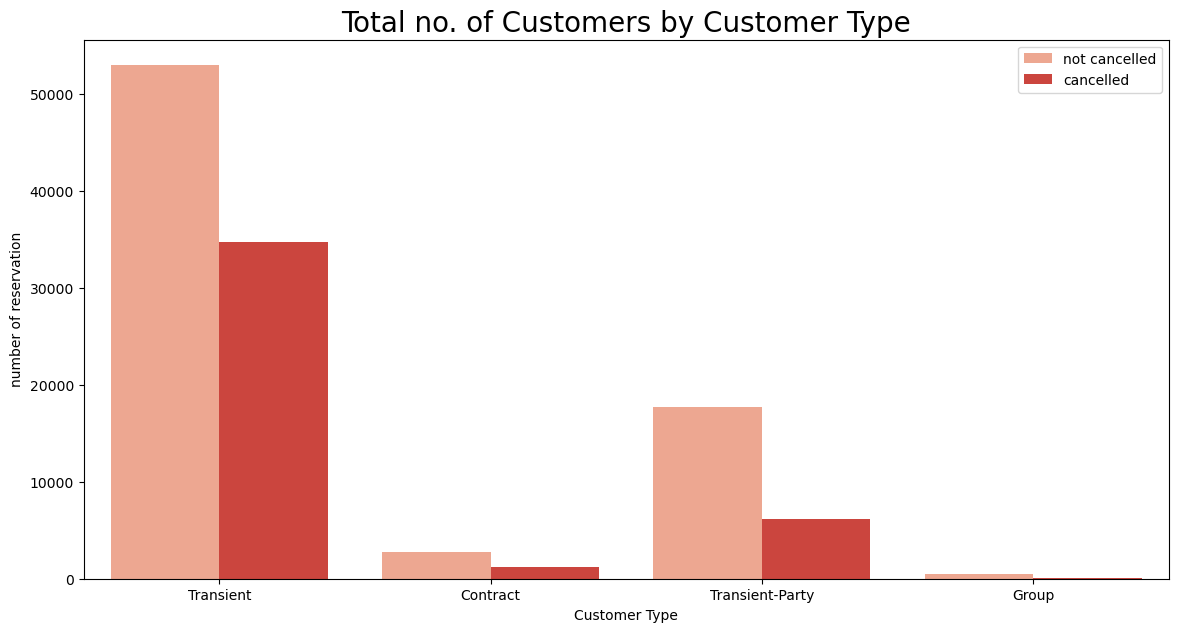

In [93]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = 'customer_type', hue = 'is_canceled', palette = 'Reds', data = dataset)
plt.title('Total no. of Customers by Customer Type', size = 20)
plt.xlabel('Customer Type')
plt.ylabel('number of reservation')
plt.legend(['not cancelled', 'cancelled'])
plt.show()

The accompanying chart shows, most bookings are from Transient customers and more than 75% customers tend to cancel reservation in comparison to confirmed reservation.

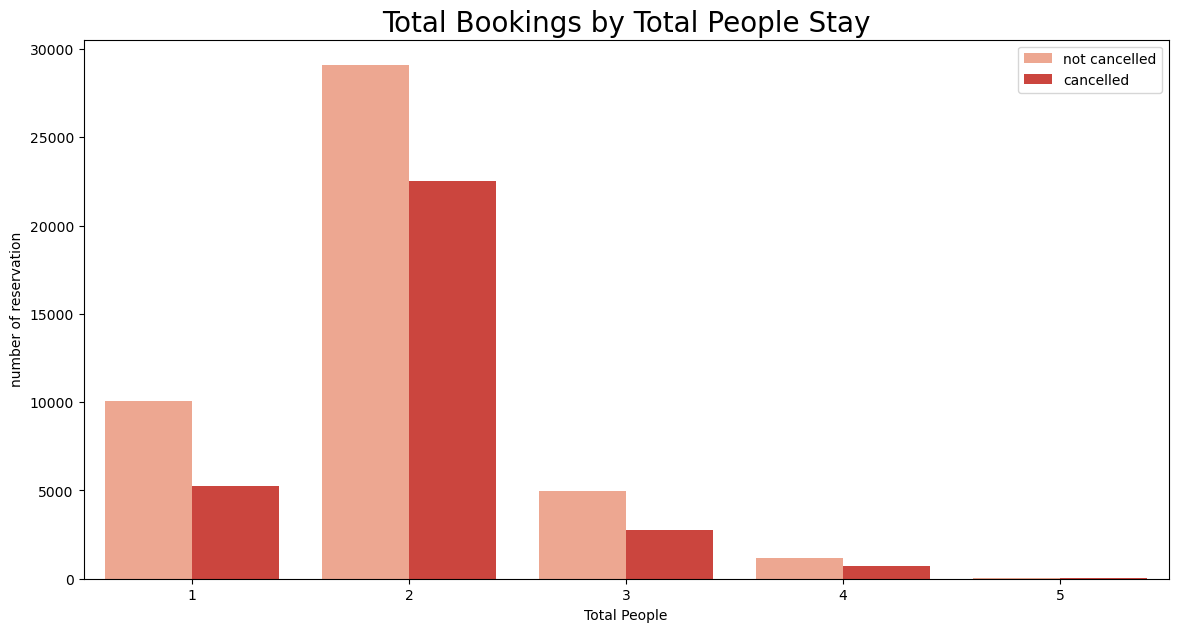

In [94]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = 'total_people', hue = 'is_canceled', palette = 'Reds', data = dataset[dataset['hotel']=='City Hotel'])
plt.title('Total Bookings by Total People Stay', size = 20)
plt.xlabel('Total People')
plt.ylabel('number of reservation')
plt.legend(['not cancelled', 'cancelled'])
#plt.show()
plt.savefig('tpeoplestay', dpi=200, bbox_inches='tight')

The accompanying chart shows, mostly there are 2 peoples who stay in the room and more than 75% customers tend to cancel reservation in comparison to confirmed reservation.

### Repeated Status

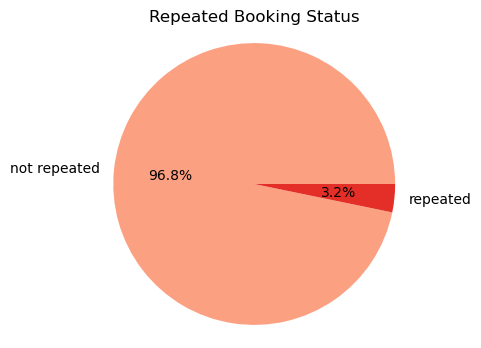

In [95]:
repeated_counts = dataset['is_repeated_guest'].value_counts(normalize = True)
plt.figure(figsize=(4,4))
colors = sns.color_palette('Reds', n_colors=len(repeated_counts))
plt.pie(repeated_counts, labels=['not repeated', 'repeated'], colors = colors, autopct='%1.1f%%')
plt.title('Repeated Booking Status')
plt.axis('equal')
#plt.show()
plt.savefig('repstatus', dpi=200, bbox_inches='tight')

The accompanying pie chart shows the percentage of reservations that are repeated and those that are not. Most customers are not repeated, only 3.2% are repeated customers.

### Previous Cancellation 

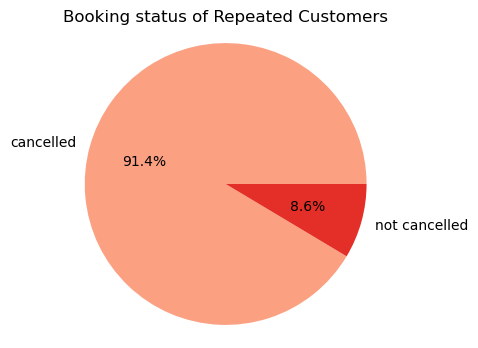

In [96]:
previous_cancelled = dataset[dataset['previous_cancellations']>0]['is_canceled'].value_counts()
plt.figure(figsize=(4,4))
colors = sns.color_palette('Reds', n_colors=len(previous_cancelled))
plt.pie(previous_cancelled, labels=['cancelled', 'not cancelled'], colors = colors, autopct='%1.1f%%')
plt.title('Booking status of Repeated Customers')
plt.axis('equal')
#plt.show()
plt.savefig('bsrepeated', dpi=200, bbox_inches='tight')

The accompanying pie chart shows the percentage of customers with previous cancellations, repeated customers are less in numbers, in that 91% tend to cancel reservation.

### Top 10 Agents with Previous Cancellation

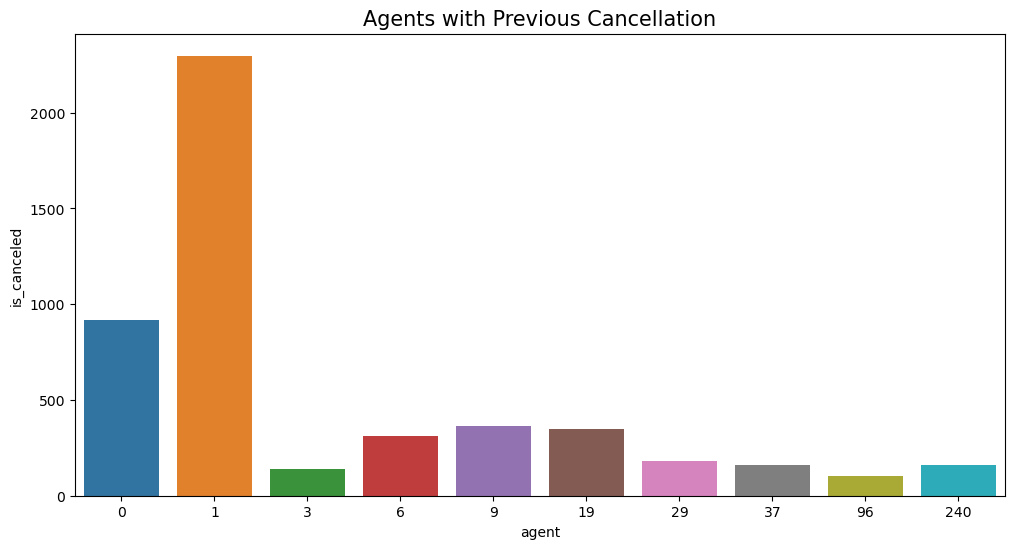

In [97]:
agents=dataset[dataset['previous_cancellations']>0].groupby('agent')['is_canceled'].size().reset_index().sort_values('is_canceled', ascending = False)[:10]
plt.figure(figsize = (12, 6))
sns.barplot(x = 'agent', y = 'is_canceled', data = agents)
plt.title('Agents with Previous Cancellation', fontsize = 15)
plt.show()

The above bar graph shows top 10 agents with previous cancellations, as we can see agent with id: 1 has most number of cancellations.

### Booking Cancellation 

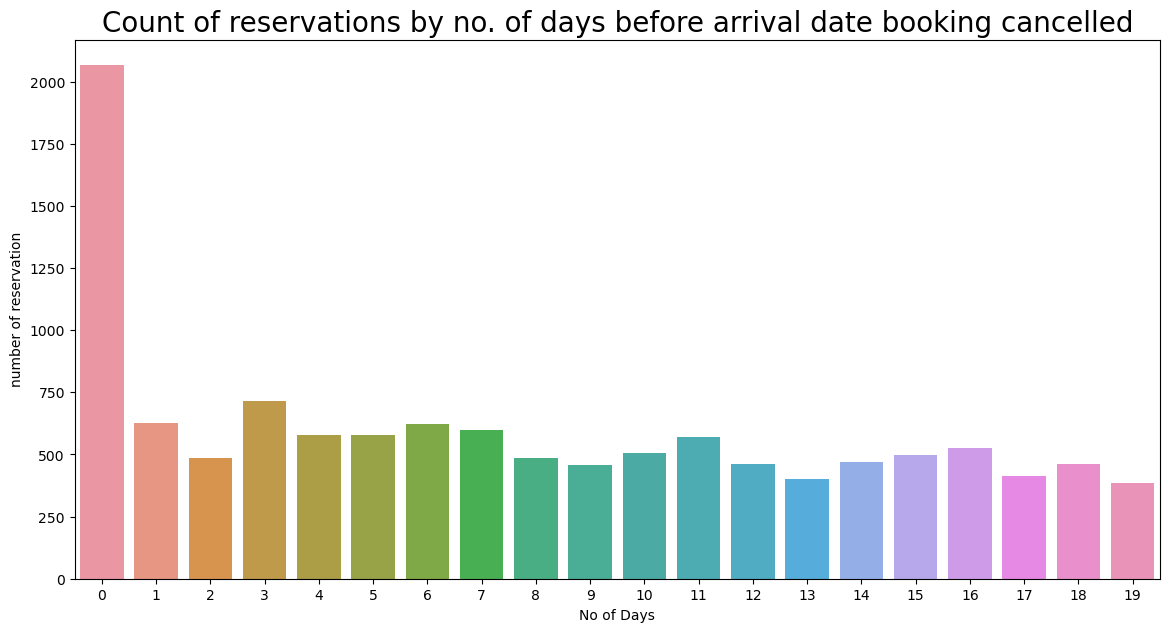

In [98]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x = 'no_of_days', data = cancelled_dataset[(cancelled_dataset['no_of_days']>=0)&(cancelled_dataset['no_of_days']<20)])
plt.title('Count of reservations by no. of days before arrival date booking cancelled', size = 20)
plt.xlabel('No of Days')
plt.ylabel('number of reservation')
#plt.show()
plt.savefig('daysbeforearr', dpi=200, bbox_inches='tight')

The accompanying chart shows how many days back starting from arrival day, reservation was cancelled. Highest cancellations are done on the same day as arrival day, it also includes no-show.

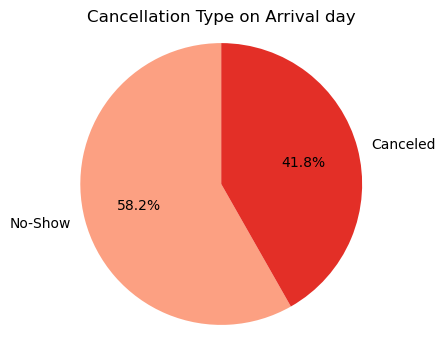

In [100]:
arr_cancelled = cancelled_dataset[(cancelled_dataset['no_of_days']==0)]['reservation_status'].value_counts()
plt.figure(figsize=(4,4))
colors = sns.color_palette('Reds', n_colors=len(arr_cancelled))
plt.pie(arr_cancelled, labels = arr_cancelled.index, colors = colors, autopct='%1.1f%%', startangle = 90)
plt.title('Cancellation Type on Arrival day')
plt.axis('equal')
#plt.show()
plt.savefig('arrdaycancelledtype', dpi=200, bbox_inches='tight')

The above pie chart shows the percentage of booking cancellation on arrival day, in which 42% of cancelled reservations are no-show.

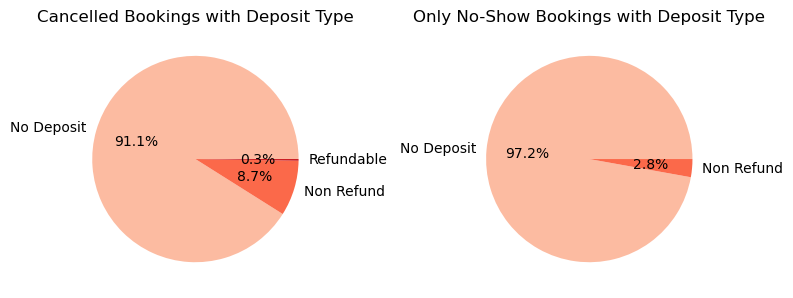

In [101]:
canceled_counts = cancelled_dataset[(cancelled_dataset['no_of_days']>=0)&(cancelled_dataset['no_of_days']<20)&(cancelled_dataset['reservation_status']!='No-Show')]['deposit_type'].value_counts(normalize = True)
no_show_counts = cancelled_dataset[cancelled_dataset['reservation_status']=='No-Show']['deposit_type'].value_counts(normalize = True)
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
colors = sns.color_palette('Reds', n_colors=len(canceled_counts))
axs[0].pie(canceled_counts, labels=canceled_counts.index, colors = colors, autopct='%1.1f%%')
axs[0].set_title('Cancelled Bookings with Deposit Type')
axs[1].pie(no_show_counts, labels=no_show_counts.index, colors = colors, autopct='%1.1f%%')
axs[1].set_title('Only No-Show Bookings with Deposit Type')
plt.tight_layout()
#plt.show()
plt.savefig('cancelleddepotype', dpi=200, bbox_inches='tight')

Most of the cancelled reservations are done without any deposit and 8.7% were non refundable. In No-Show most of the reservations are done without any deposit and 2.8% are non refundable. 

### Top 10 countries with cancelled Bookings

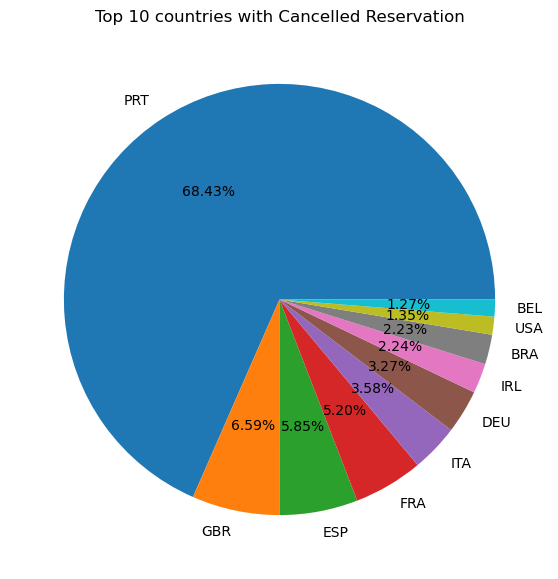

In [102]:
cancelled_data = dataset[dataset['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (7,7))
plt.title('Top 10 countries with Cancelled Reservation')
plt.pie(top_10_country, autopct = '%1.2f%%', labels = top_10_country.index)
#plt.show()
plt.savefig('top10country', dpi=200, bbox_inches='tight')

The above pie chart shows the top 10 countries with cancellations, in which cancelled reservations are highest in portugal and rest 32% of cancellations are from other countries.

### Suggestions
1. As compared to Resort hotels City hotels have higher cancellation rate and in the month of January cancellations are even more. So, hotels can start campaigns or marketing with new year environment that can attract the customers.
2. Cancellation rates are higher when prices are higher, in city hotels prices do not vary much, prices should vary according to seasons or demand. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations.
3. Only 3.2% of previous customers reserved again in same hotel, and most of them cancelled the reservation. So, should increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate. They can also provide discounts to previous customers.
4. Reservation with higher lead time tends cancel the most, so hotels should allow customers to reserve room with shorter lead time.
5. Cancellations are more, when customers reserve room without any deposits and cancellations or no-show are higher on the arrival day. In order avoid cancellations and vacant rooms, hotels need to make customers reserve room with some deposit.
6. More no. of reservations are with 2 peoples, mostly couples. Hotels should provide services according to type of customers.